# *Organización de datos 75.06/ 95.58*

#  Trabajo práctico 1

# Análisis exploratorio de datos 

**Segundo cuatrimestre del 2020**

Compu_Datos

Apellido y nombre    | Padrón

Alejandro Balladares | 101118

# 1 Introducción

El objetivo principal del análisis exploratorio de datos permite comprender las mejor las características de un conjunto de datos. Es imprescindible detectar patrones, relaciones, tendencias, valores comunes, valores atípicos que nos permitan comprender la naturaleza de estos.  Para esto se requieren herramientas que nos permita visualizar,  analizar y formular hipótesis.

# 2. Analisis general
En esta sección se realizará la importación del set  datos, un muestreo preliminar, estructura y datos faltantes. 

## 2.1 Importación de datos y análisis preliminar
Se dispone de un archivo csv que nos brinda información sobre distintas oportunidades de ventas. Cada línea del archivo nos da información sobre un oportunidad en particular. Se realiza la lectura de los datos y se muestra una vista rápida para poder familiarizarnos con la información incluida en el archivo.

In [478]:
#importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

%matplotlib inline
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (20, 10)

colores = ['red', 'blue', 'green', 'orange', 'cyan']
stage_list = ['Closed Won','Closed Lost']

In [479]:
df = pd.read_csv('train.csv')
df.head().T

,0,1,2,3,4
ID,27761,27760,27446,16808,16805
Region,EMEA,EMEA,Americas,Americas,Americas
Territory,None,None,NW America,NW America,NW America
"Pricing, Delivery_Terms_Quote_Appr",1,0,0,1,1
"Pricing, Delivery_Terms_Approved",1,0,0,0,0
Bureaucratic_Code_0_Approval,1,0,0,1,1
Bureaucratic_Code_0_Approved,1,0,0,0,0
Submitted_for_Approval,0,0,0,0,0
Bureaucratic_Code,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_5,Bureaucratic_Code_5
Account_Created_Date,6/16/2015,6/16/2015,4/21/2015,7/27/2013,7/27/2013


## 2.2 Datos faltantes en el Dataframe

No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber la cantidad de datos faltantes en cada columna del DataFrame. Se procedió a hacer un conteo de la cantidad de datos nulos y comparar usando el total de datos.

In [481]:
columnas = ['ID','Region','Territory', 'Pricing, Delivery_Terms_Quote_Appr','Pricing, Delivery_Terms_Approved',
            'Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
            'Bureaucratic_Code','Account_Created_Date',
            #'Source',
            'Billing_Country', 'Account_Name',
            'Opportunity_Name', 'Opportunity_ID', 'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
            'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms', 'Opportunity_Created_Date',
            'Brand', 'Product_Type','Size', 'Product_Category_B', 'Price','Currency',
            'Last_Activity',
            'Quote_Expiry_Date','Last_Modified_By','Product_Family','Product_Name',
            'ASP_Currency','ASP','ASP_(converted)_Currency','ASP_(converted)','Planned_Delivery_Start_Date',
            'Planned_Delivery_End_Date','Month','Delivery_Quarter','Delivery_Year',
            'Actual_Delivery_Date',
            'TRF','Total_Amount_Currency','Total_Amount', 'Total_Taxable_Amount_Currency','Total_Taxable_Amount',
            'Stage'
            ,'Prod_Category_A'
           ]

nulls = pd.DataFrame(df[columnas].isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls = nulls.reset_index()
nulls = nulls.loc[nulls.nulls>0]
nulls

,index,nulls,porcentaje
47,Total_Amount,59,0.35
48,ASP,3209,18.94
49,ASP_(converted),3209,18.94


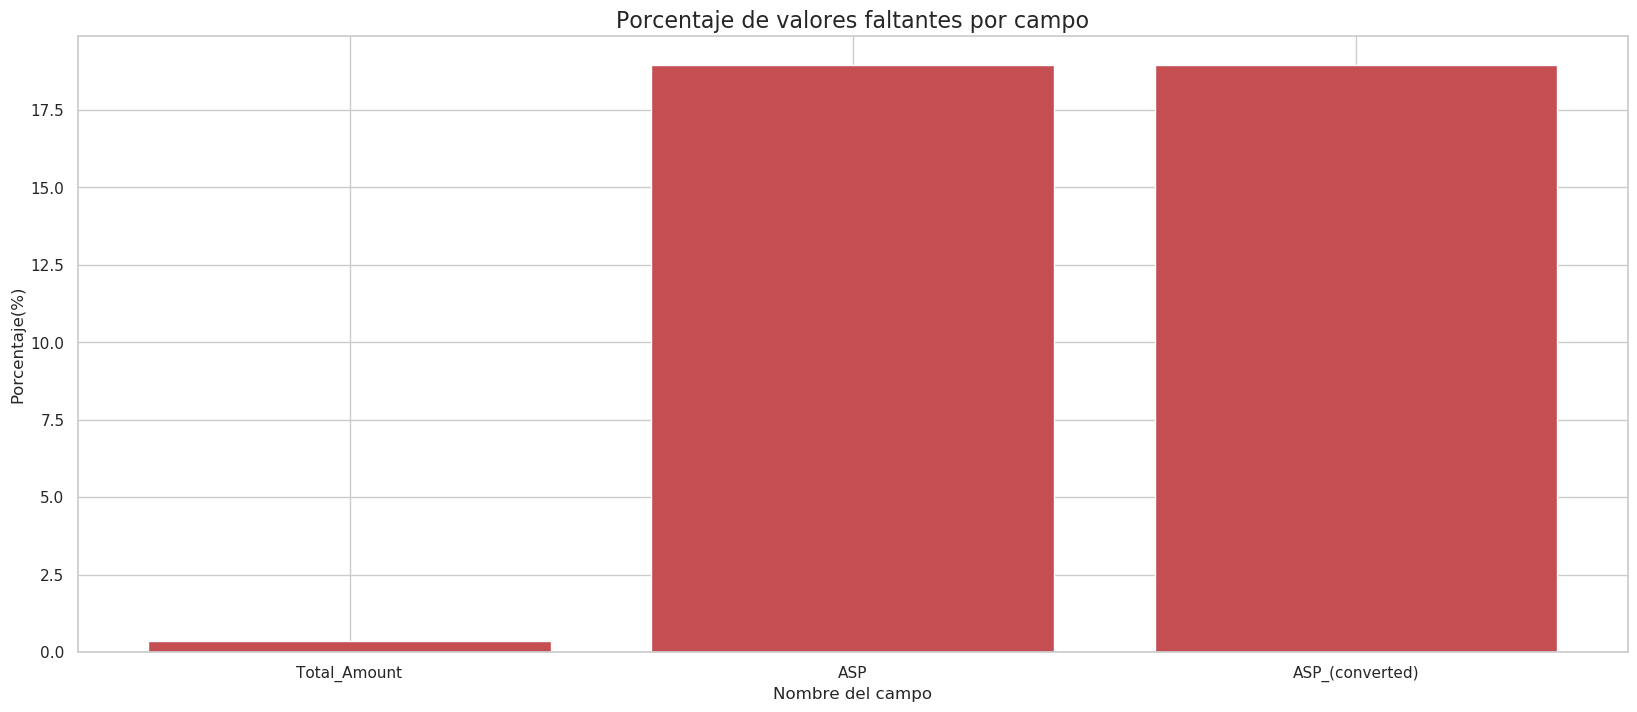

In [482]:
# Tamaño
plt.figure(figsize=(20,8))
# Título
plt.title('Porcentaje de valores faltantes por campo', fontsize=16)
# Eje X
plt.xlabel('Nombre del campo')
# Eje Y
plt.ylabel('Porcentaje(%)')
plt.bar(height=nulls["porcentaje"], x=nulls["index"], color='C3')

plt.show()

Observamos que solo 3 columnas tienen valores nulos, el Total_Amount, el ASP y el ASP_(converted) y son porcentajes bastantes bajos, el Total_Amount no llega ni al uno por ciento.
De todas formas, esto no significa que el resto de los datos sean utiles, hay algunas columnas que están completamente vacias, al no poder sacar información de ellas serán eliminadas del DataFrame.

In [484]:
df = df.drop(columns=['Prod_Category_A'], inplace = False)
df = df.drop(columns=['Last_Activity'], inplace = False)
df = df.drop(columns=['Actual_Delivery_Date'], inplace = False)
#--------------------------------------------------------------------------
df = df.drop(columns=['Submitted_for_Approval'], inplace = False) # Es una variable binaria pero todos sus
    #valores son cero
df = df.drop(columns=['Sales_Contract_No'], inplace = False) #tiene casi 7000 nones, y no se que representa la variable
df = df.drop(columns=['Quote_Type'], inplace = False) # es binaria pero no se que significa
df = df.drop(columns=['Brand'], inplace = False) # la mayoria es None y la segunda mayoria es other
df = df.drop(columns=['Product_Type'], inplace = False)# la mayoria es None y la segunda mayoria es other
df = df.drop(columns=['Size'], inplace = False)# la mayoria es None y la segunda mayoria es other
df = df.drop(columns=['Product_Category_B'], inplace = False)# la mayoria es None y la segunda mayoria es other
df = df.drop(columns=['Price'], inplace = False)# la mayoria es None y la segunda mayoria es other
df = df.drop(columns=['Currency'], inplace = False)# la mayoria es None y la segunda mayoria es other

In [485]:
df['Account_Created_Date'] = pd.to_datetime(df['Account_Created_Date'])

df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'])
df['Opportunity_Created_Date_MM'] = pd.DatetimeIndex(df['Opportunity_Created_Date']).month.astype(int)
df['Opportunity_Created_Date_YYYY'] = pd.DatetimeIndex(df['Opportunity_Created_Date']).year.astype(int)

df['Quote_Expiry_Date'] = pd.to_datetime(df['Quote_Expiry_Date'])
#df['Quote_Expiry_Date_MM'] = pd.DatetimeIndex(df['Quote_Expiry_Date']).month.astype(int)
#df['Quote_Expiry_Date_YYYY'] = pd.DatetimeIndex(df['Quote_Expiry_Date']).year.astype(int)

df['Last_Modified_Date'] = pd.to_datetime(df['Last_Modified_Date'])
df['Last_Modified_Date_MM'] = pd.DatetimeIndex(df['Last_Modified_Date']).month.astype(int)
df['Last_Modified_Date_YYYY'] = pd.DatetimeIndex(df['Last_Modified_Date']).year.astype(int)

df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'])
df['Planned_Delivery_Start_Date_YYYY'] = pd.DatetimeIndex(df['Planned_Delivery_Start_Date']).year.astype(int)
df['Planned_Delivery_Start_Date_MM'] = pd.DatetimeIndex(df['Planned_Delivery_Start_Date']).month.astype(int)

df['Planned_Delivery_End_Date'] = pd.to_datetime(df['Planned_Delivery_End_Date'])

## Analisis de región

En esta sección analizaremos cuales son las regiones que más aparecen entre los datos.

Text(0, 0.5, 'Cantidad de apariciones')

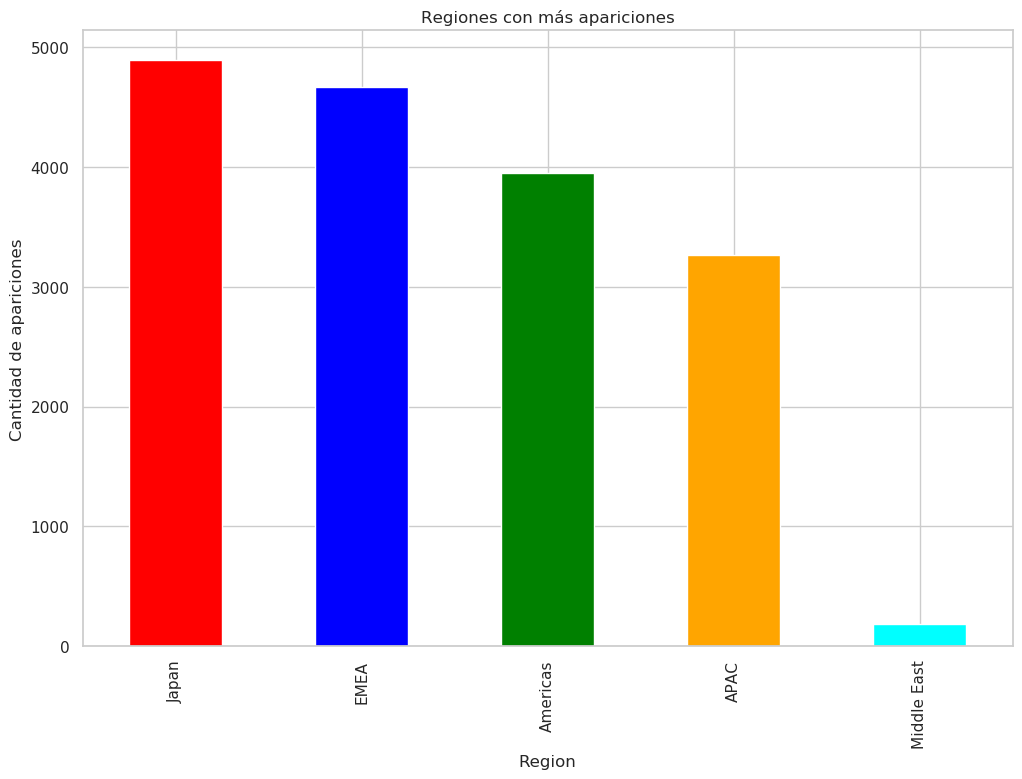

In [487]:
region = pd.DataFrame(df['Region'].value_counts())
region.columns = ['cantidad']

region["cantidad"].plot(kind="bar",title = 'Regiones con más apariciones' , figsize=(12,8), color=colores)
plt.xlabel('Region', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

<Figure size 100x100 with 0 Axes>

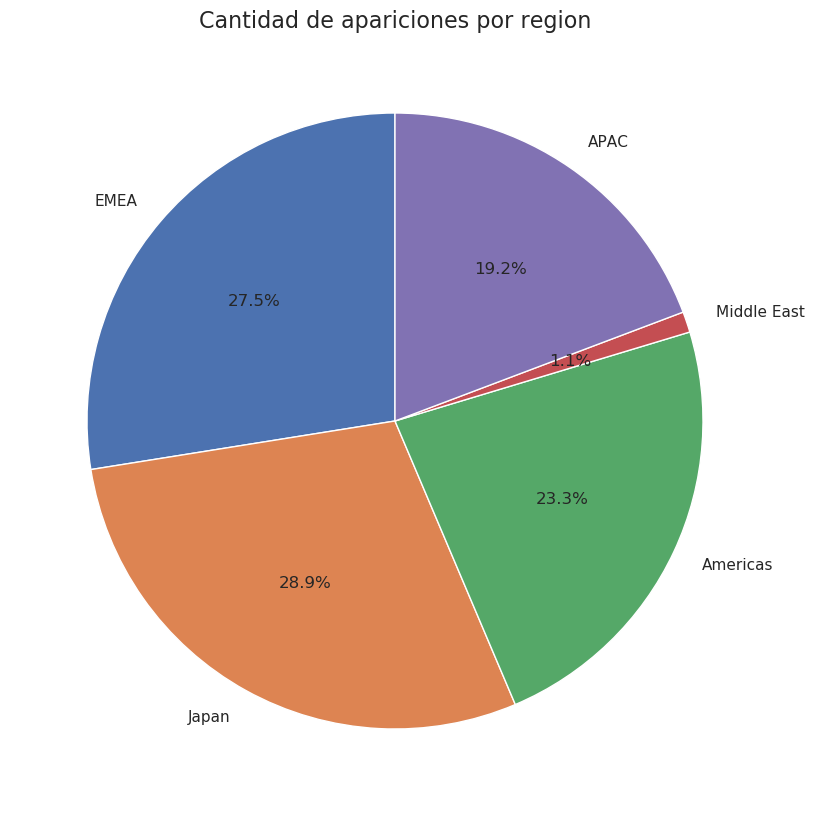

In [488]:
emea = df[df['Region'] == 'EMEA']
americas = df[df['Region'] == 'Americas']
apac = df[df['Region'] == 'APAC']
japan = df[df['Region'] == 'Japan']
me = df[df['Region'] == 'Middle East']

cant_emea = emea['Region'].count()
cant_americas = americas['Region'].count()
cant_japan = japan['Region'].count()
cant_me = me['Region'].count()
cant_apac = apac['Region'].count()

# Tamaño
plt.figure(figsize=(1,1))
fig1, ax1 = plt.subplots()
ax1.pie([cant_emea, cant_japan, cant_americas, cant_me, cant_apac], labels=['EMEA',
                'Japan','Americas','Middle East','APAC'], autopct='%1.1f%%', startangle=90)
plt.title("Cantidad de apariciones por region", fontsize=16)
plt.show()

Creo que esta es una de las pocas ocasiones en las que se puede usar un pie chart sin miedo a que no se entienda nada.

Podemos observar que Japón es el que tiene más apariciones pero por muy poco, en particular Middle East es la única que tiene una considerable baja presencia lo cual condicionará bastante su analisis.

EMEA = Europa, oriente medio y Africa.

pero por otro lado también tenemos a oriente medio por separado

## Analisis del Stage por región

Como el tp 2 va a girar en torno a los Stage, es conveniente analizar como se comportan con todas las secciones, comenzaremos combinandolo con el analisis anterior, viendo cuales con las regiones y sus respectivos Stages.

In [489]:
stage = df.groupby(['Region','Stage']).agg({'Stage': 'count'})
stage.columns = ['cantidad']
stage = stage.reset_index()

stage_filtrada = stage.loc[stage.cantidad > 40] #para eliminar los estados con muy pocos valores

stage = stage.pivot(index='Region',columns='Stage',values='cantidad')
stage.fillna(value=0, inplace=True)
stage

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Region,,,,,
APAC,"1,355.00","1,896.00",0.00,8.00,3.00
Americas,"2,140.00","1,793.00",8.00,4.00,0.00
EMEA,"2,189.00","2,471.00",1.00,3.00,0.00
Japan,"1,546.00","3,323.00",1.00,14.00,8.00
Middle East,120.00,50.00,8.00,6.00,0.00


In [490]:
stage_aux = stage.reset_index()
#stage_aux

Text(0.5, 1.05, 'Group Middle East')

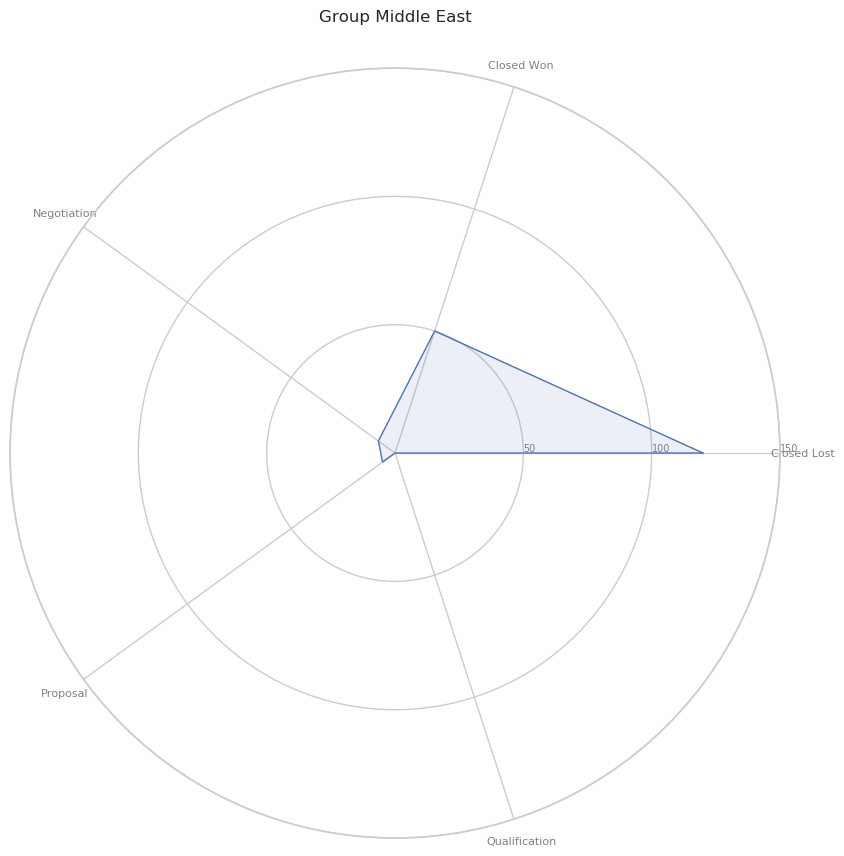

In [491]:
categories=list(stage_aux)[1:]
N = len(categories)

values = stage_aux.loc[4].drop('Region').values.flatten().tolist()
values += values[:1]
values
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
ax.set_rlabel_position(0)
plt.yticks([50,100,150], ["50","100","150"], color="grey", size=7)
plt.ylim(0,150)
 
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
ax.fill(angles, values, 'b', alpha=0.1)
plt.title('Group Middle East')

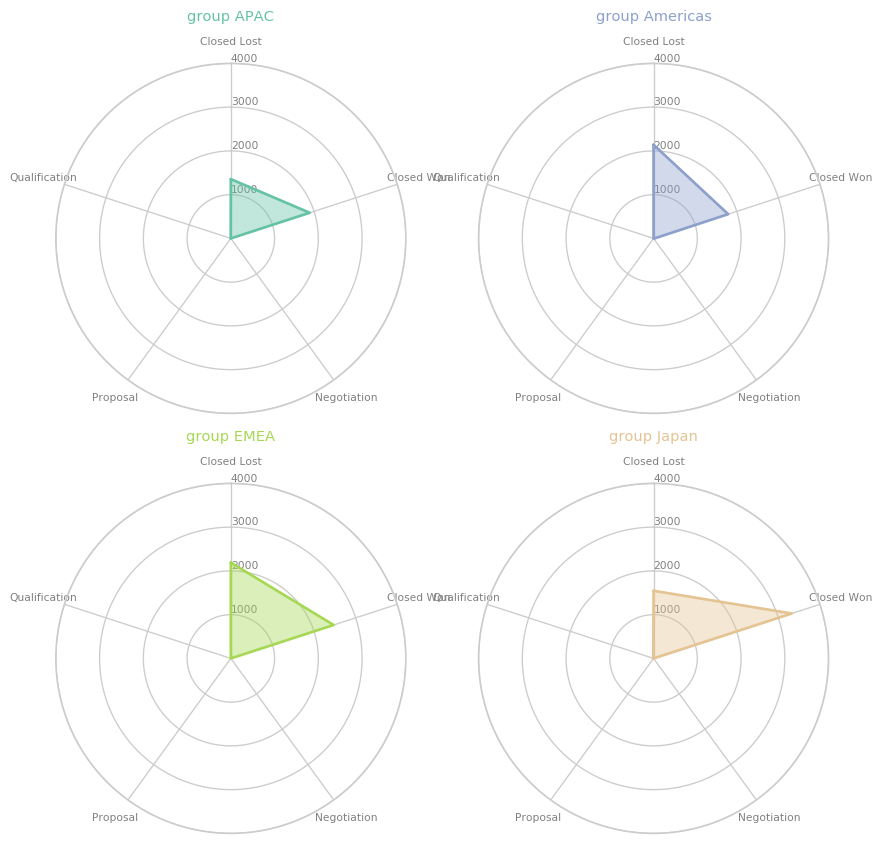

In [492]:
def make_spider( row, title, color):

    categories=list(stage_aux)[1:]
    N = len(categories)
 
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    ax = plt.subplot(2,2,row+1, polar=True, )
 
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    ax.set_rlabel_position(0)
    plt.yticks([1000,2000,3000,4000], ["1000","2000","3000","4000"], color="grey", size=8)
    plt.ylim(0,4000)
 
    values = stage_aux.loc[row].drop('Region').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    plt.title(title, size=11, color=color, y=1.1)
    
    
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
my_palette = plt.cm.get_cmap("Set2", len(stage_aux.index))
 
for row in range(0, len(stage_aux.index)-1):
    make_spider(row=row, title='group '+stage_aux['Region'][row], color=my_palette(row))

Lamentablemente no pude hacer los 5 en un solo gráfico y en el segundo se superponen el closed won izquierno con el qualification derecho.

Observamos que de las 5 opciones de Stage, solo 2 nos van a importar realmente: "Closed Lost" y "Closed Won", de las otras 3 casi ni hay datos por lo que cualquier analisis sería poco fructifero.

Volviendo a los graficos, se observa que Japón tiene una mayor cantidad de ventas con un estado "Closed Won" en comparación con el "Closed Lost" mientras que las otras regiones si bien tiene más ventas conseguidas que perdidas (excepto Americas) la diferencia entre ambas no es muy marcada.

Lo graficaremos de otra forma para que note un poco más (y sin los 3 stages que no aportan nada)


In [493]:
stage_filtrada = stage_filtrada.reset_index()
stage_filtrada = stage_filtrada.pivot(index='Region',columns='Stage',values='cantidad')
stage_filtrada.fillna(value=0, inplace=True)
stage_filtrada

Stage,Closed Lost,Closed Won
Region,,
APAC,1355,1896
Americas,2140,1793
EMEA,2189,2471
Japan,1546,3323
Middle East,120,50


Text(216.25, 0.5, 'Region')

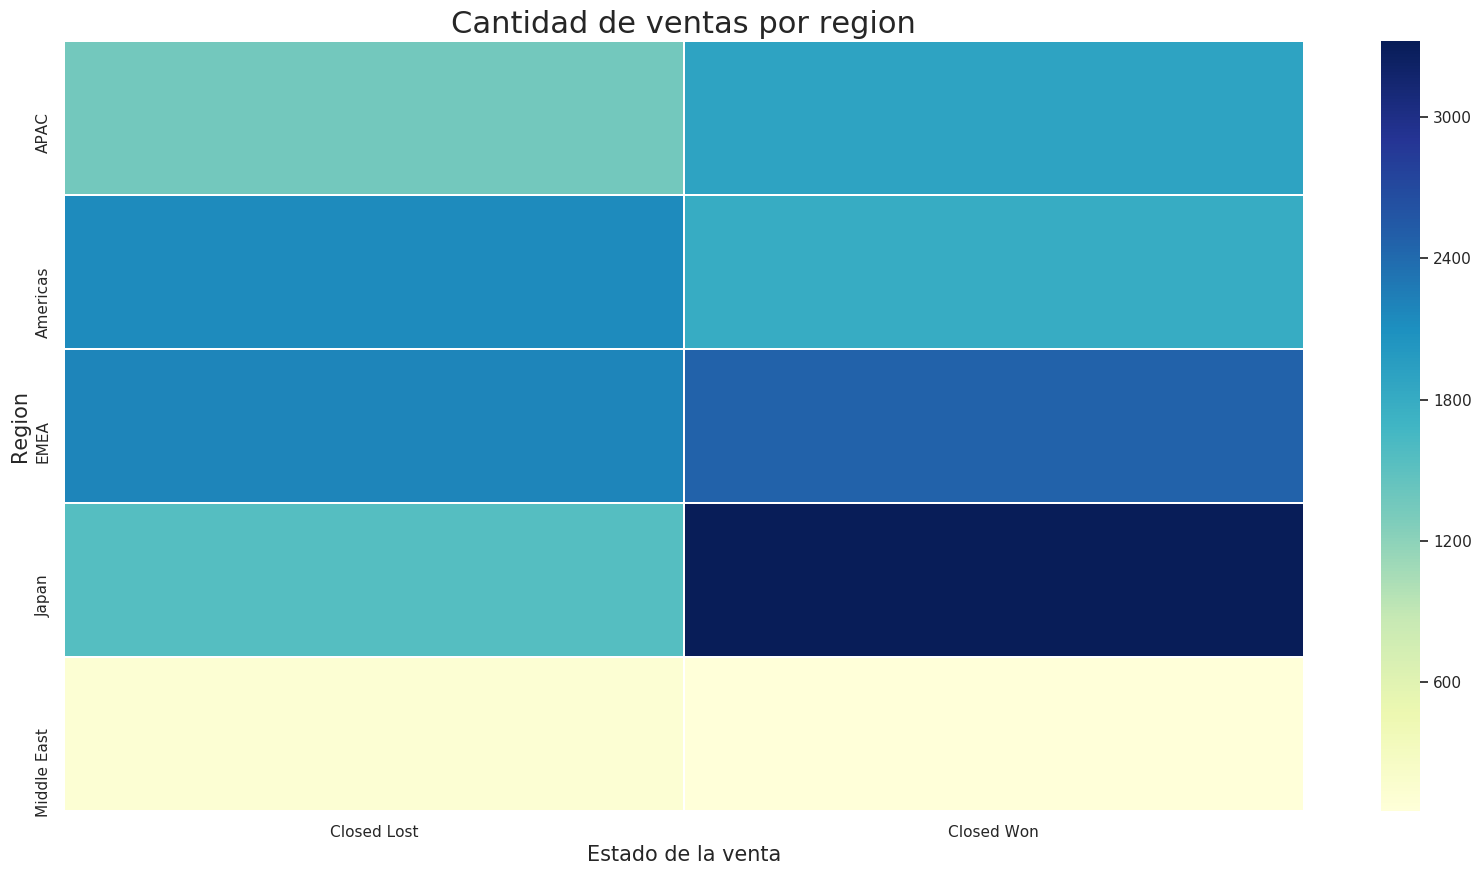

In [494]:
g = sns.heatmap(stage_filtrada, linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de ventas por region", fontsize=22)
g.set_xlabel("Estado de la venta",fontsize=15)
g.set_ylabel("Region", fontsize=15) #no me gusta como quedó


DESCRIPCIÓN 

## Analisis del territorio

Ahora veremos cuales son los territorios con más apariciones, del primer analisis podemos intuir que Japón estará presente pero veremos que otros lugares aparecen.

Text(0, 0.5, 'Cantidad de apariciones')

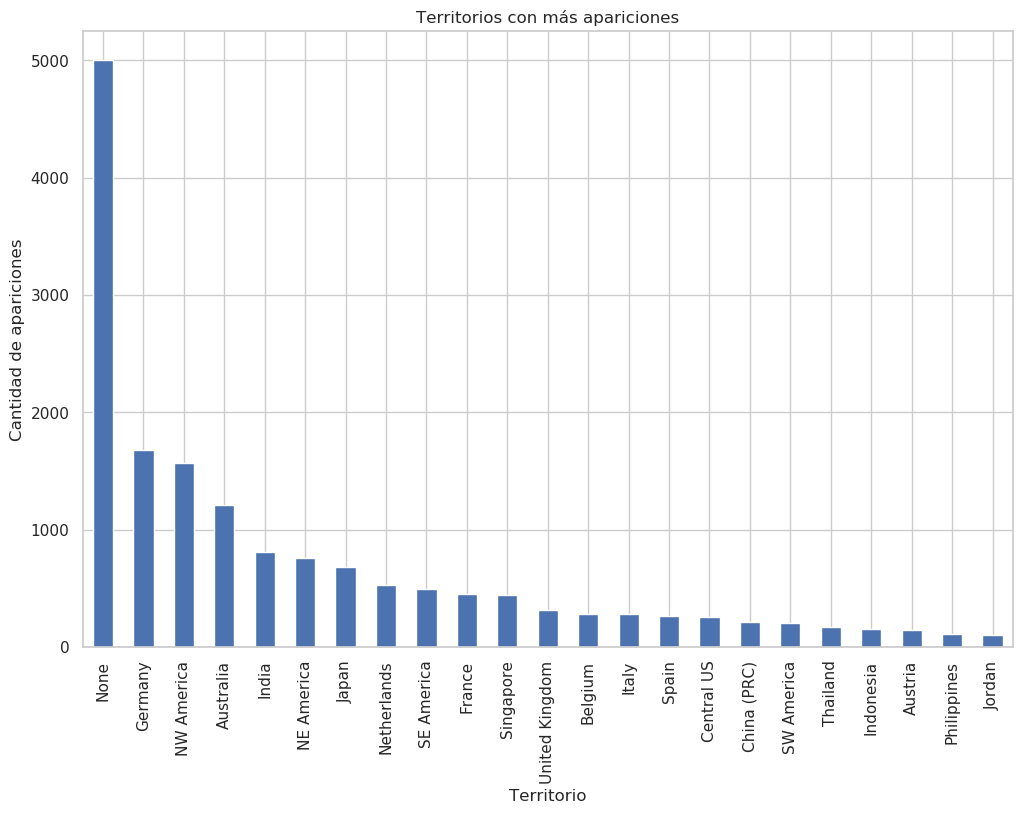

In [496]:
territory = pd.DataFrame(df['Territory'].value_counts())
territory.columns = ['cantidad']
territory_filtradas = territory.loc[(territory.cantidad > 100)] #Numero a elección

territory_filtradas["cantidad"].plot(kind="bar",title = 'Territorios con más apariciones' , figsize=(12,8))
plt.xlabel('Territorio', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

Lo primero que podemos notar es que hay demasiados con 'None', tienen región pero no territorio lo cual difucultará un poco el analisis. Antes de continuar con el analisis, veremos cuales son las regiones con más valores None.

In [497]:
df_none = df.loc[df.Territory == 'None']
df_none = df_none.groupby('Region')['Total_Amount'].agg(['count','mean'])
df_none.columns = ['cantidad_nones','mean_Toal_Amount_nones']
df_none

,cantidad_nones,mean_Toal_Amount_nones
Region,,
Americas,567,"1,900,071.61"
EMEA,185,"2,572,472.11"
Japan,4205,"1,905,317.70"
Middle East,30,"2,861,305.20"


In [498]:
df_valores = df.loc[df.Territory != 'None']
df_valores = df_valores.groupby('Region')['Total_Amount'].agg(['count','mean'])
df_valores.columns = ['cantidad_valores','mean_Total_Amount_valores']
#df_valores

In [499]:
df_mergeado = pd.merge(df_valores,df_none, on='Region',how='left')

In [500]:
df_mergeado.fillna(value=0, inplace=True)
df_mergeado

,cantidad_valores,mean_Total_Amount_valores,cantidad_nones,mean_Toal_Amount_nones
Region,,,,
APAC,3246,"1,230,141.62",0.00,0.00
Americas,3349,"1,905,303.92",567.00,"1,900,071.61"
EMEA,4473,"860,005.56",185.00,"2,572,472.11"
Japan,679,"14,113,813.01","4,205.00","1,905,317.70"
Middle East,154,"1,389,496.18",30.00,"2,861,305.20"


Text(0, 0.5, 'Cantidad de apariciones')

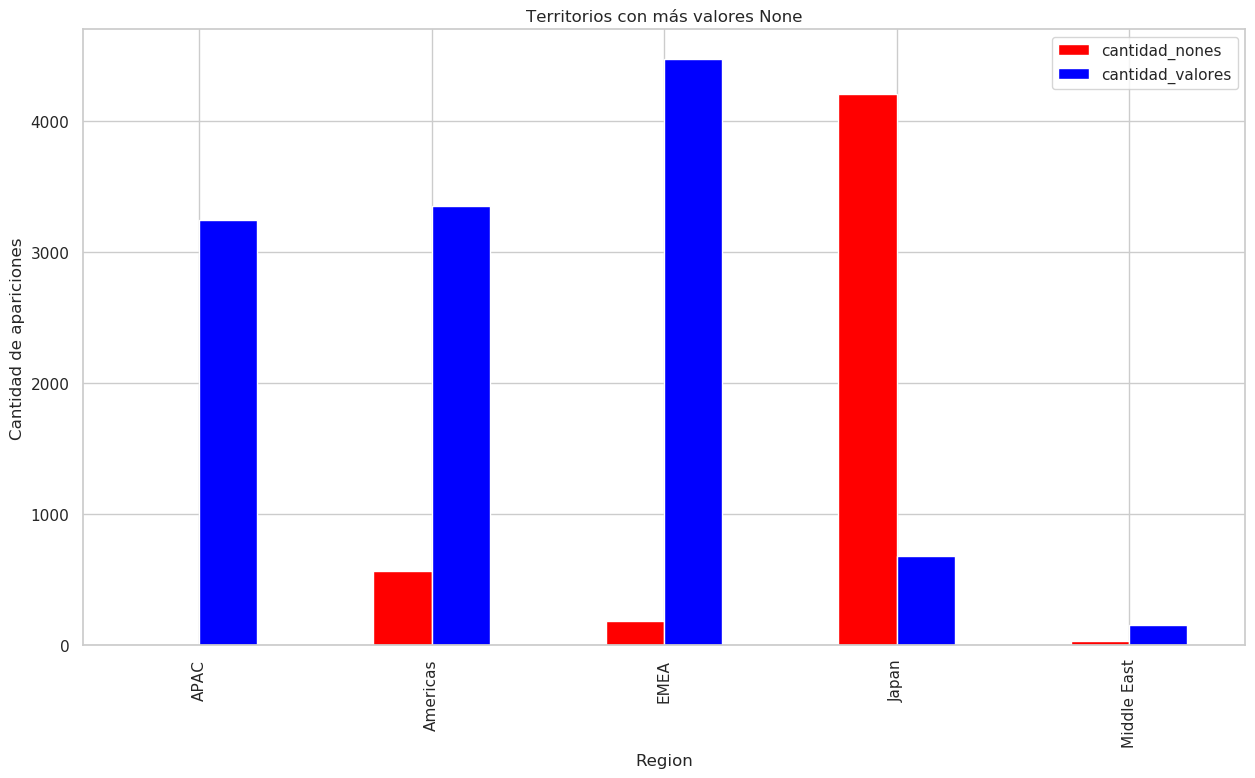

In [501]:
df_cantidades = df_mergeado[['cantidad_nones','cantidad_valores']]
df_cantidades.plot(kind="bar",color=colores, stacked=False,figsize=(15,8), title = 'Territorios con más valores None')
plt.xlabel('Region', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

Observamos que Japón tiene más del 80% de valores territorio 'None', el resto tiene muy pocos a comparación del total. Un detalle muy curioso es que "APAC" no tiene ningún valor None en sus filas.

Ahora veremos que tanto afecta esos valores none a las regiones cuando queremos averiguar el promedio del Total Amount. La hipotesis "obvia" es que el territorio Japón perdería una parte considerable de sus "ganancias" al tener un alto porcentaje de nones mientras que el Americas y EMEA no deberían tener muchas complicaciones ya que tienen un bajo porcentaje de valores none. En particular APAC no va a aportar mucha info ya que el no posee valores none.

Text(0, 0.5, 'Cantidad: 0.1 = 1 millon')

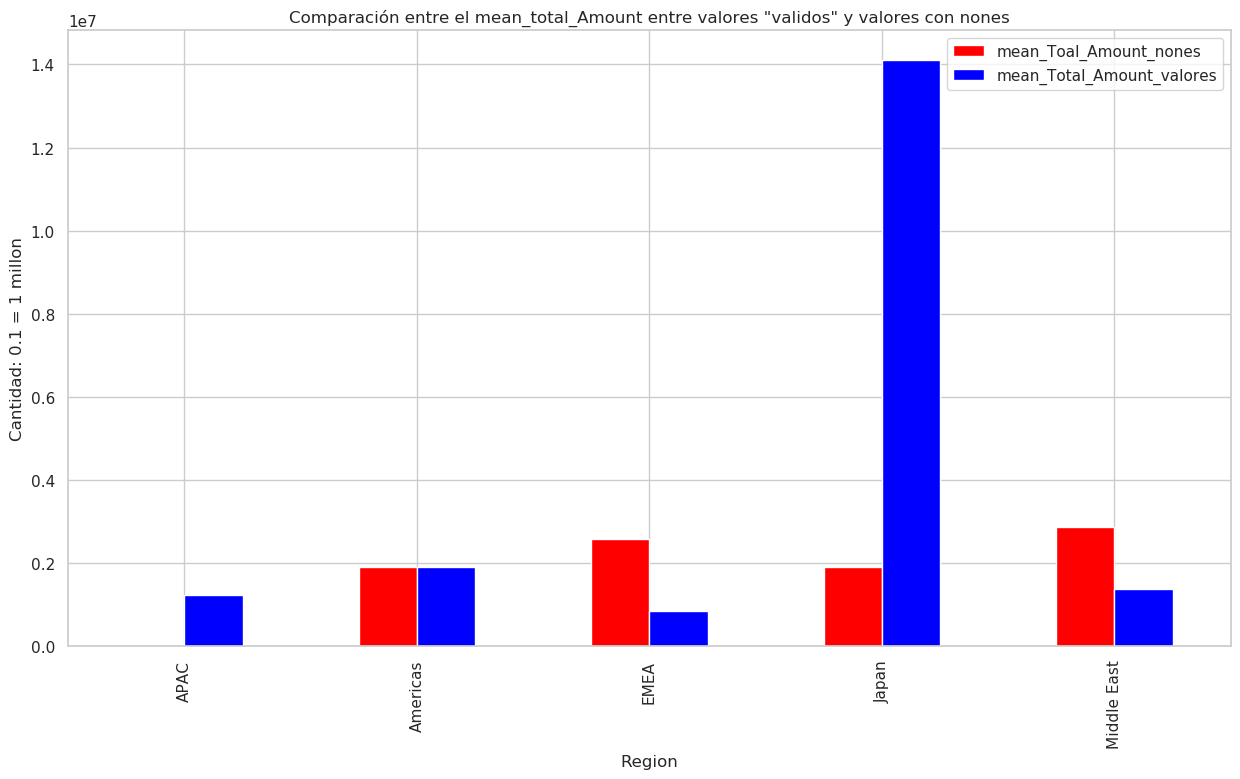

In [502]:
df_promedios = df_mergeado[['mean_Toal_Amount_nones','mean_Total_Amount_valores']]
df_promedios.plot(kind="bar",color=colores, stacked=False,figsize=(15,8), title = 'Comparación entre el mean_total_Amount entre valores "validos" y valores con nones')
plt.xlabel('Region', fontsize= 12)
plt.ylabel("Cantidad: 0.1 = 1 millon", fontsize= 12)

Podemos ver que la región Japon tiene más del 80\% de valores none en su territorio y sin embargo ese 20\% tiene un promedio de Total\_Amount mayor. Aparentemente todas las oportunidades con valores none tiene un precio muy bajo que no afecta al total. 

Americas tiene muchisimos más valores validos (sin none) pero en promedio de precio estan muy igualados, lo cual tampoco era muy intuitivo. 

Lo mismo para EMEA, solo que en este caso, si perdió en promedio de total amount ante los valores none, deben ser pocas ventas pero muy caras.

El caso de Japón es particular ya que la región "Japan" solo tiene 2 posibles valores: "none" y "japan", entonces podría cambiar todos esos none por japan con un bajo riesgo de error, distinto es con las otras regiones que tienen varios territorios diferentes y no podría asumir a cual sería el correcto.


Ahora volvamos al primer grafico de los territorios con más apariciones pero saquemos el 'None' para poder terminar ese analisis.

Text(0, 0.5, 'Cantidad de apariciones')

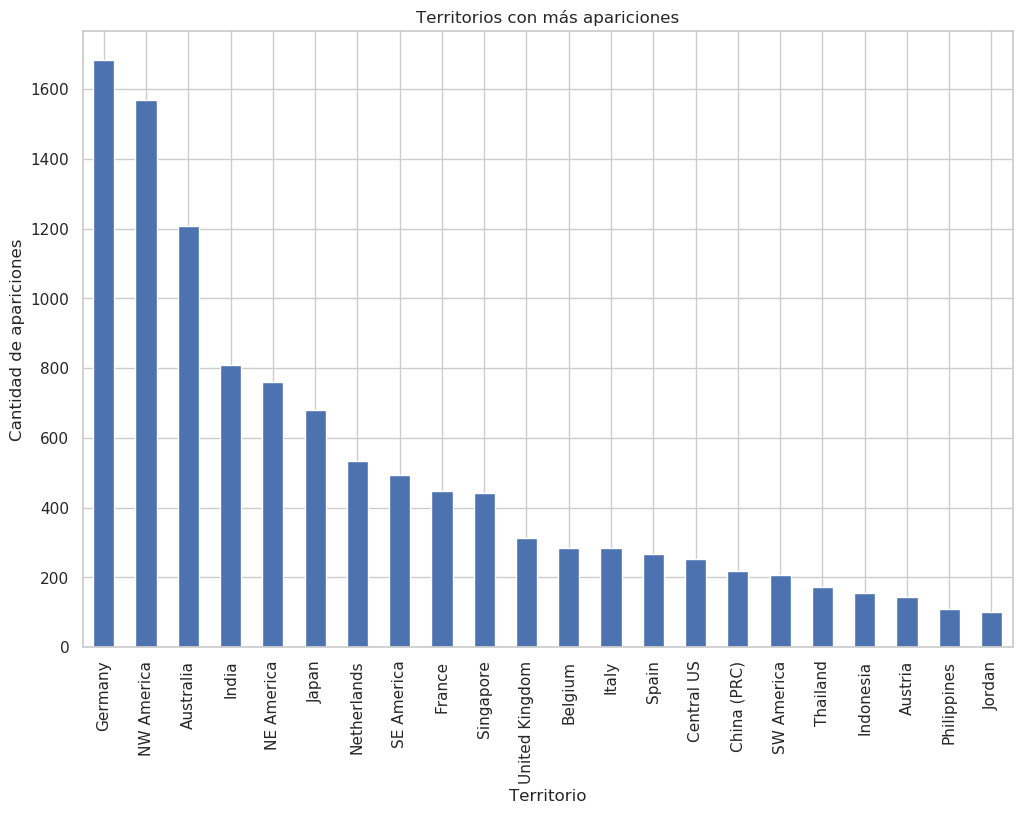

In [503]:
territory_filtradas = territory.loc[(territory.cantidad > 100) & (territory.cantidad < 4000)]
territory_filtradas["cantidad"].plot(kind="bar",title = 'Territorios con más apariciones' , figsize=(12,8))
plt.xlabel('Territorio', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

Descripción y analisis

## Analisis de territorios con mayor cantidad de ventas (creo)

Anaizaremos las ventas quitando el valor de territorio 'None' ya que no tendría sentido que apareciera.

In [504]:
ventas = df.loc[df.Territory != 'None']
ventas = ventas.groupby('Territory')['Total_Amount'].agg(['count','mean'])
ventas.columns = ['ventas_totales','promedio_precio_compra']
#ventas.nlargest(15,'ventas_totales')
#KSA = Arabia Saudita

In [505]:
ventas_exitosas = df.loc[(df.Territory != 'None') & (df.Stage == 'Closed Won')]
ventas_exitosas = ventas_exitosas.groupby('Territory')['Total_Amount'].agg(['count','mean'])
ventas_exitosas.columns = ['ventas_exitosas','promedio_precio_exitosas']
#ventas_exitosas.nlargest(15,'ventas_exitosas_totales')

In [506]:
ventas_perdidas = df.loc[(df.Territory != 'None') & (df.Stage == 'Closed Lost')]
ventas_perdidas = ventas_perdidas.groupby('Territory')['Total_Amount'].agg(['count','mean'])
ventas_perdidas.columns = ['ventas_perdidas','promedio_precio_perdidas']
#ventas_perdidas.nlargest(15,'promedio_precio_perdidas')

In [507]:
ventas_final = ventas.join(ventas_exitosas, on='Territory')
ventas_final = ventas_final.join(ventas_perdidas, on='Territory')
columnas = ['ventas_totales','promedio_precio_compra','ventas_exitosas','promedio_precio_exitosas', \
          'ventas_perdidas','promedio_precio_perdidas']

ventas_final['ventas_totales'].fillna(value=0, inplace=True)
ventas_final['promedio_precio_compra'].fillna(value=0, inplace=True)
ventas_final['ventas_exitosas'].fillna(value=0, inplace=True)
ventas_final['promedio_precio_exitosas'].fillna(value=0, inplace=True)
ventas_final['ventas_perdidas'].fillna(value=0, inplace=True)
ventas_final['promedio_precio_perdidas'].fillna(value=0, inplace=True)

ventas_final = ventas_final.loc[ventas_final.ventas_totales > 100]

ventas_final.nlargest(10, 'ventas_totales')

,ventas_totales,promedio_precio_compra,ventas_exitosas,promedio_precio_exitosas,ventas_perdidas,promedio_precio_perdidas
Territory,,,,,,
Germany,1682,"722,180.71","1,023.00","264,881.42",659.00,"1,432,070.19"
NW America,1546,"1,397,837.96",973.00,"422,784.04",565.00,"3,096,459.85"
Australia,1207,"2,016,479.88",696.00,"114,026.29",505.00,"4,652,667.58"
India,809,"975,906.99",374.00,"239,587.24",433.00,"1,613,317.16"
NE America,758,"2,160,399.51",259.00,"374,301.09",499.00,"3,087,452.60"
Japan,679,"14,113,813.01",546.00,"6,651,154.39",128.00,"31,970,613.41"
Netherlands,533,"581,869.99",257.00,"206,922.42",275.00,"925,973.67"
SE America,492,"4,182,144.99",187.00,"569,391.58",301.00,"6,475,181.29"
France,448,"950,484.60",143.00,"231,097.41",305.00,"1,287,771.05"


In [508]:
#ventas_final.nlargest(10,'promedio_precio_compra')

Text(0, 0.5, 'Cantidad de ventas')

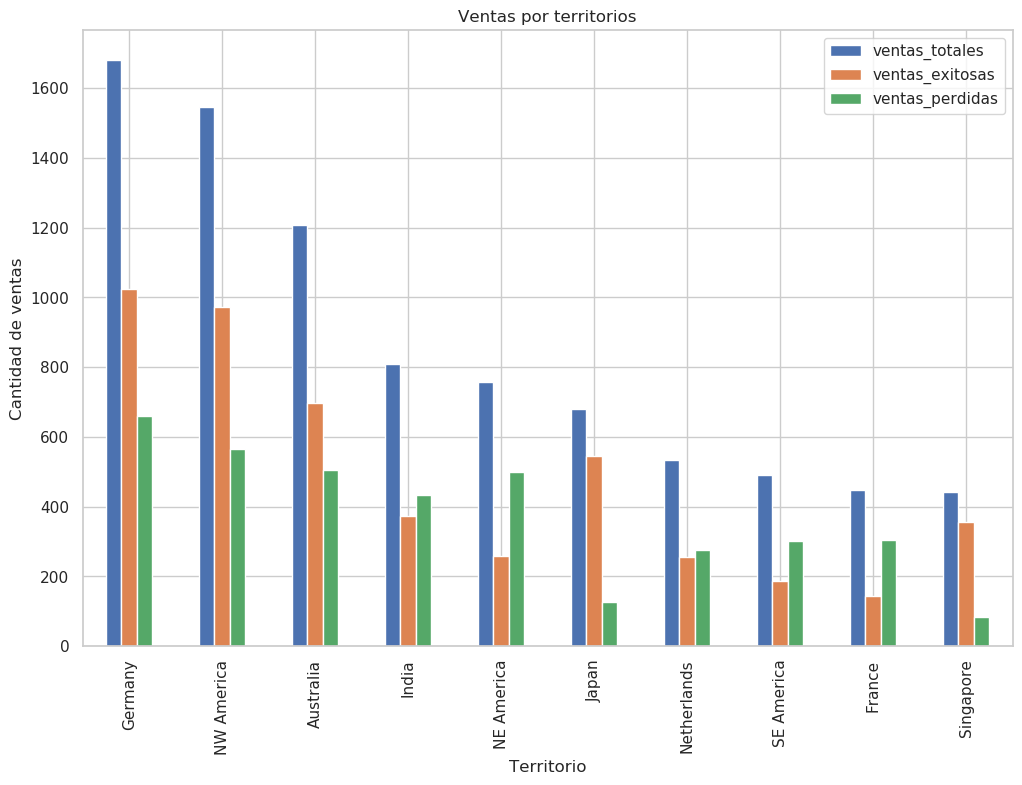

In [509]:
top10_mayores_ventas = ventas_final.nlargest(10,'ventas_totales')
top10_mayores_ventas = top10_mayores_ventas[['ventas_totales','ventas_exitosas','ventas_perdidas']]
top10_mayores_ventas.plot(kind="bar",stacked=False,title = 'Ventas por territorios' , figsize=(12,8))
plt.xlabel('Territorio', fontsize= 12)
plt.ylabel("Cantidad de ventas", fontsize= 12)

Vemos los territorios con más ventas, sería interesante ver cual es el promedio de precios de estos lugares.

In [510]:
gastos_en_top10_ventas = ventas_final.nlargest(10,'ventas_totales')
gastos_en_top10_ventas

,ventas_totales,promedio_precio_compra,ventas_exitosas,promedio_precio_exitosas,ventas_perdidas,promedio_precio_perdidas
Territory,,,,,,
Germany,1682,"722,180.71","1,023.00","264,881.42",659.00,"1,432,070.19"
NW America,1546,"1,397,837.96",973.00,"422,784.04",565.00,"3,096,459.85"
Australia,1207,"2,016,479.88",696.00,"114,026.29",505.00,"4,652,667.58"
India,809,"975,906.99",374.00,"239,587.24",433.00,"1,613,317.16"
NE America,758,"2,160,399.51",259.00,"374,301.09",499.00,"3,087,452.60"
Japan,679,"14,113,813.01",546.00,"6,651,154.39",128.00,"31,970,613.41"
Netherlands,533,"581,869.99",257.00,"206,922.42",275.00,"925,973.67"
SE America,492,"4,182,144.99",187.00,"569,391.58",301.00,"6,475,181.29"
France,448,"950,484.60",143.00,"231,097.41",305.00,"1,287,771.05"


Text(0, 0.5, 'Precios')

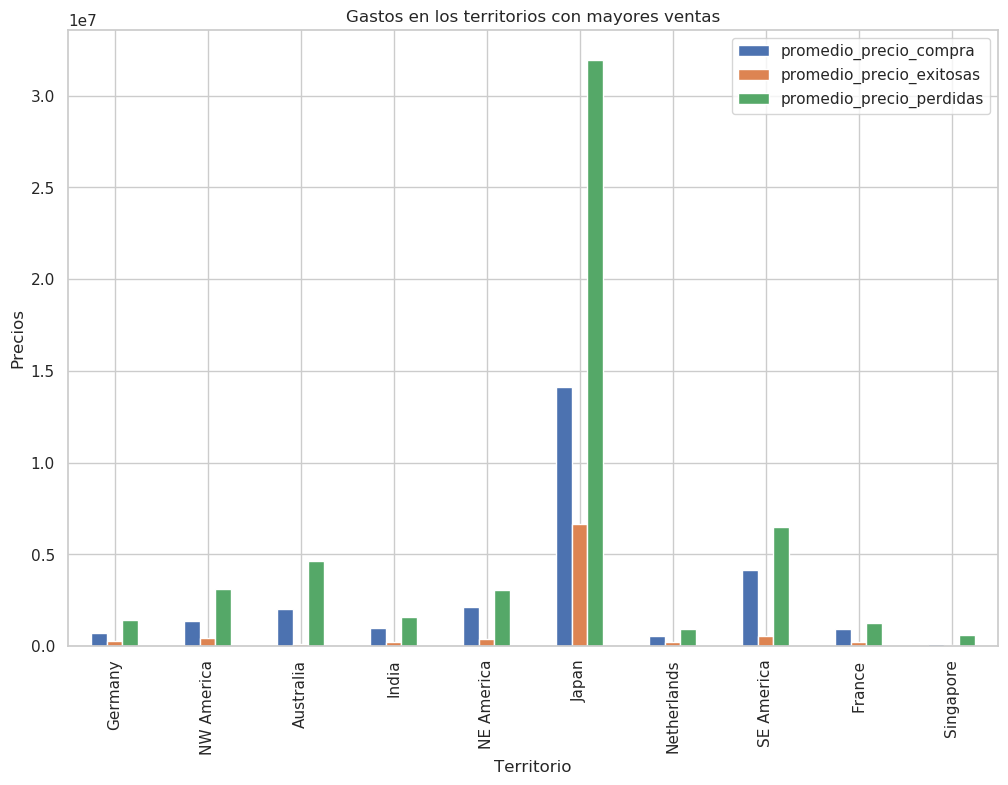

In [511]:

gastos_en_top10_ventas = gastos_en_top10_ventas[['promedio_precio_compra',\
                                                 'promedio_precio_exitosas','promedio_precio_perdidas']]
gastos_en_top10_ventas.plot(kind="bar",stacked=False,title = 'Gastos en los territorios con mayores ventas',\
                            figsize=(12,8))
plt.xlabel('Territorio', fontsize= 12)
plt.ylabel("Precios", fontsize= 12)

Text(0, 0.5, 'Precios')

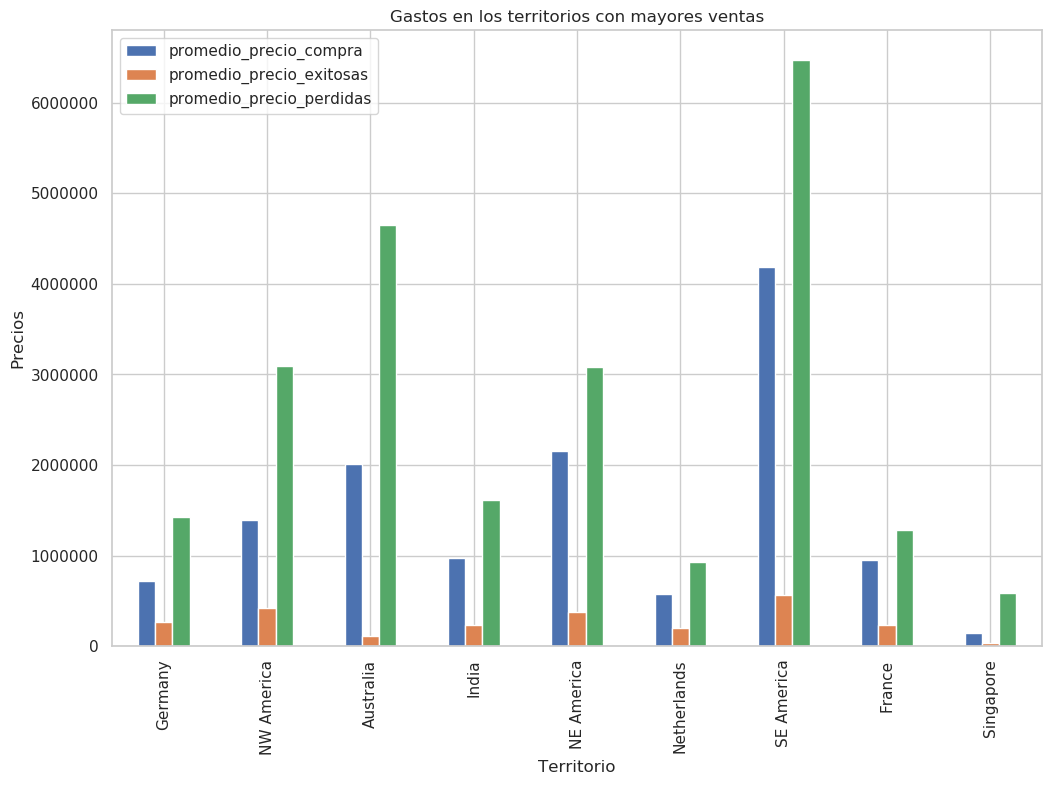

In [512]:
gastos_en_top10_ventas = gastos_en_top10_ventas.loc[gastos_en_top10_ventas.promedio_precio_compra < 14000000]
#gastos_en_top10_ventas

gastos_en_top10_ventas = gastos_en_top10_ventas[['promedio_precio_compra',\
                                                 'promedio_precio_exitosas','promedio_precio_perdidas']]
gastos_en_top10_ventas.plot(kind="bar",stacked=False,title = 'Gastos en los territorios con mayores ventas',\
                            figsize=(12,8))
plt.xlabel('Territorio', fontsize= 12)
plt.ylabel("Precios", fontsize= 12)

Esto es muy interesante, salvo por Japón, los territorios con mayores cantidades de ventas tienen un promedio de gastos muy bajo...continuar

Ahora veremos cuales son los territorios con mayor "total amount" (revisar)

In [513]:
ventas_final.nlargest(10,'promedio_precio_compra')

,ventas_totales,promedio_precio_compra,ventas_exitosas,promedio_precio_exitosas,ventas_perdidas,promedio_precio_perdidas
Territory,,,,,,
Japan,679,"14,113,813.01",546.00,"6,651,154.39",128.00,"31,970,613.41"
SE America,492,"4,182,144.99",187.00,"569,391.58",301.00,"6,475,181.29"
SW America,205,"2,367,204.44",46.00,"332,223.65",159.00,"2,955,941.02"
NE America,758,"2,160,399.51",259.00,"374,301.09",499.00,"3,087,452.60"
Australia,1207,"2,016,479.88",696.00,"114,026.29",505.00,"4,652,667.58"
NW America,1546,"1,397,837.96",973.00,"422,784.04",565.00,"3,096,459.85"
Jordan,102,"1,258,080.82",33.00,"66,135.14",67.00,"1,878,758.06"
United Kingdom,313,"1,080,408.17",122.00,"486,706.72",191.00,"1,459,631.08"
India,809,"975,906.99",374.00,"239,587.24",433.00,"1,613,317.16"


Text(0, 0.5, 'Precio')

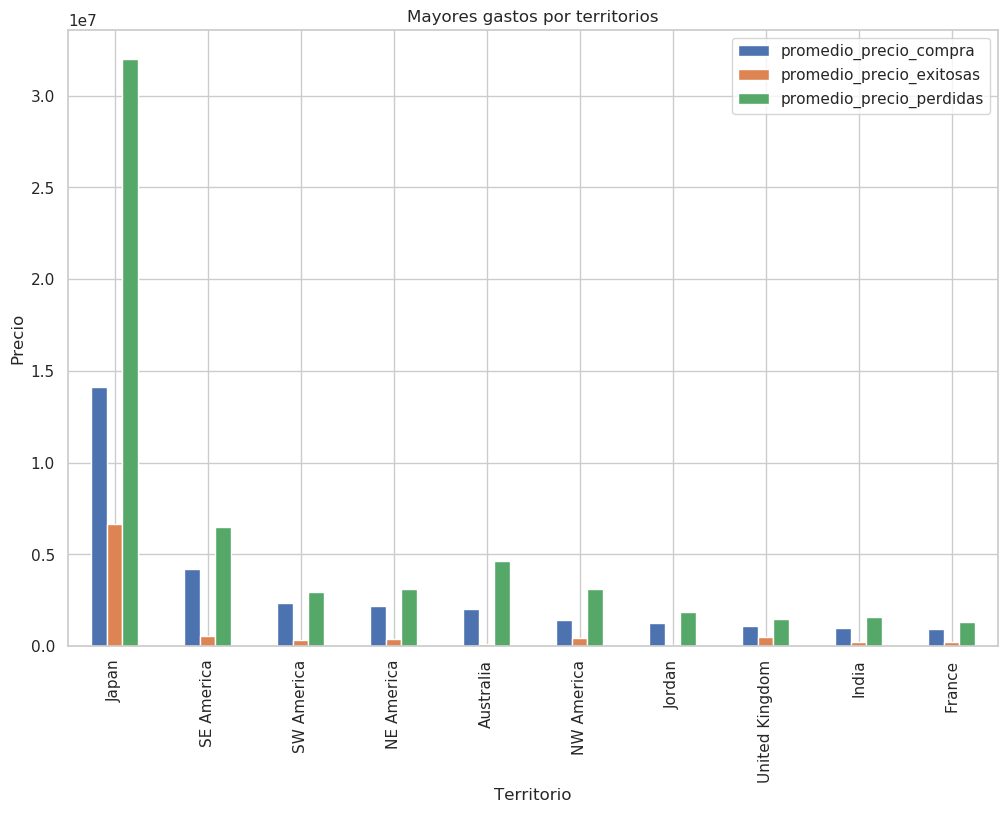

In [514]:
top10_mayores_gastos = ventas_final.nlargest(10,'promedio_precio_compra')
top10_mayores_gastos = top10_mayores_gastos[['promedio_precio_compra',\
                                             'promedio_precio_exitosas','promedio_precio_perdidas']]
top10_mayores_gastos.plot(kind="bar",stacked=False,title = 'Mayores gastos por territorios' , figsize=(12,8))
plt.xlabel('Territorio', fontsize= 12)
plt.ylabel("Precio", fontsize= 12)

Las más caras fracasan en general, a menos que seas Japón. Vemos que Japón se sale de los estandares en todos los analisis.

Text(0, 0.5, 'Precio')

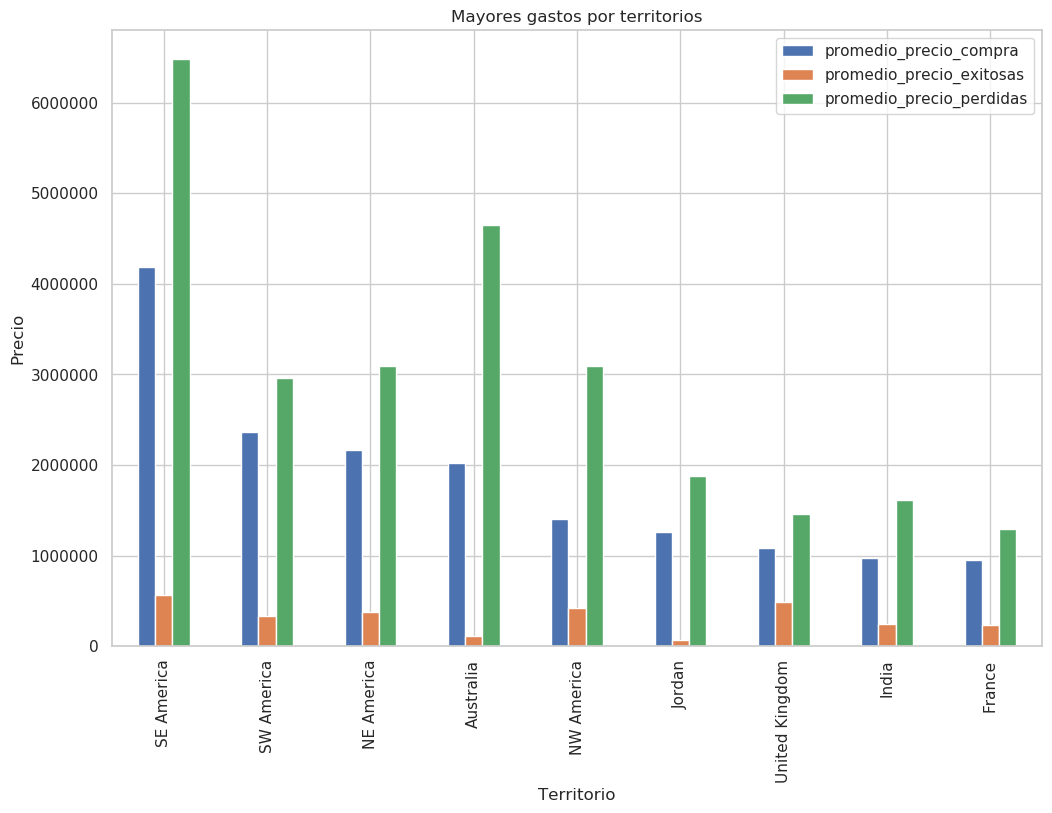

In [515]:
top10_mayores_gastos = ventas_final.nlargest(10,'promedio_precio_compra')
top10_mayores_gastos = top10_mayores_gastos.loc[top10_mayores_gastos.promedio_precio_perdidas < 31000000]
top10_mayores_gastos = top10_mayores_gastos[['promedio_precio_compra',\
                                             'promedio_precio_exitosas','promedio_precio_perdidas']]
top10_mayores_gastos.plot(kind="bar",stacked=False,title = 'Mayores gastos por territorios' , figsize=(12,8))
plt.xlabel('Territorio', fontsize= 12)
plt.ylabel("Precio", fontsize= 12)

In [516]:
ventas_final.nlargest(10,'promedio_precio_exitosas')

,ventas_totales,promedio_precio_compra,ventas_exitosas,promedio_precio_exitosas,ventas_perdidas,promedio_precio_perdidas
Territory,,,,,,
Japan,679,"14,113,813.01",546.00,"6,651,154.39",128.00,"31,970,613.41"
SE America,492,"4,182,144.99",187.00,"569,391.58",301.00,"6,475,181.29"
United Kingdom,313,"1,080,408.17",122.00,"486,706.72",191.00,"1,459,631.08"
NW America,1546,"1,397,837.96",973.00,"422,784.04",565.00,"3,096,459.85"
NE America,758,"2,160,399.51",259.00,"374,301.09",499.00,"3,087,452.60"
SW America,205,"2,367,204.44",46.00,"332,223.65",159.00,"2,955,941.02"
Germany,1682,"722,180.71","1,023.00","264,881.42",659.00,"1,432,070.19"
India,809,"975,906.99",374.00,"239,587.24",433.00,"1,613,317.16"
Central US,254,"893,863.42",104.00,"237,403.19",150.00,"1,349,009.18"


Text(0, 0.5, 'Precio')

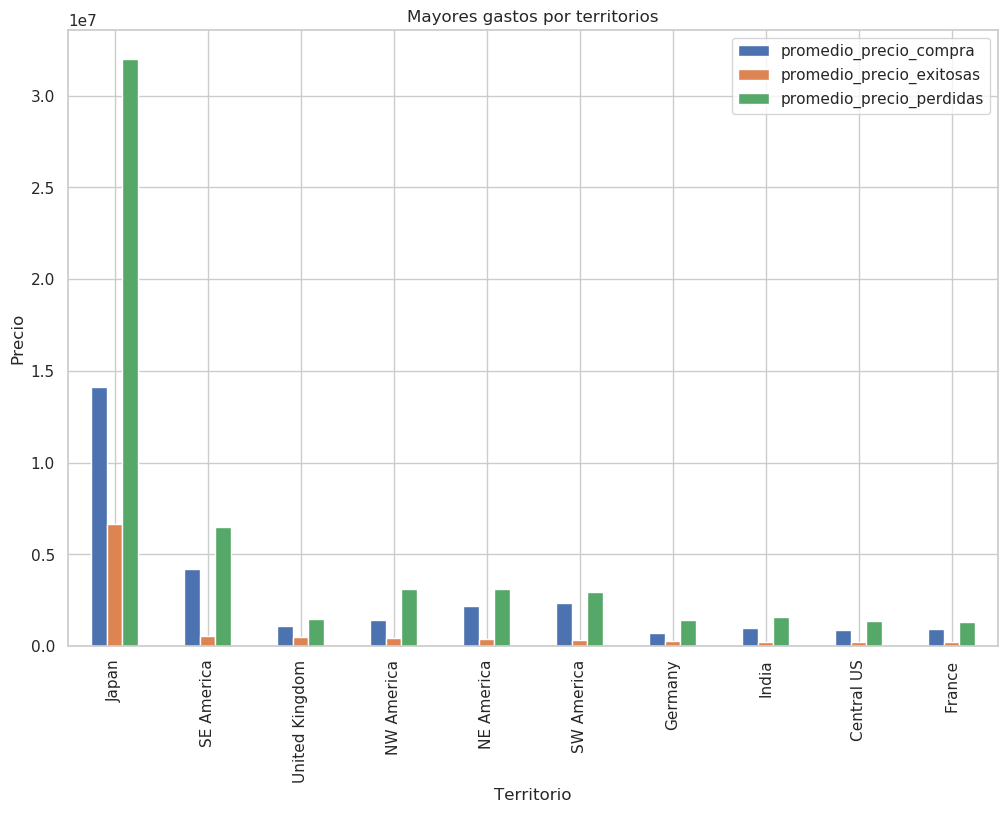

In [517]:
top10_mayores_gastos_exitosos = ventas_final.nlargest(10,'promedio_precio_exitosas')
top10_mayores_gastos_exitosos = top10_mayores_gastos_exitosos[['promedio_precio_compra','promedio_precio_exitosas','promedio_precio_perdidas']]
top10_mayores_gastos_exitosos.plot(kind="bar",stacked=False,title = 'Mayores gastos por territorios' , figsize=(12,8))
plt.xlabel('Territorio', fontsize= 12)
plt.ylabel("Precio", fontsize= 12)

In [518]:
#ventas_final.nlargest(10,'promedio_precio_perdidas')

Text(0, 0.5, 'Precio')

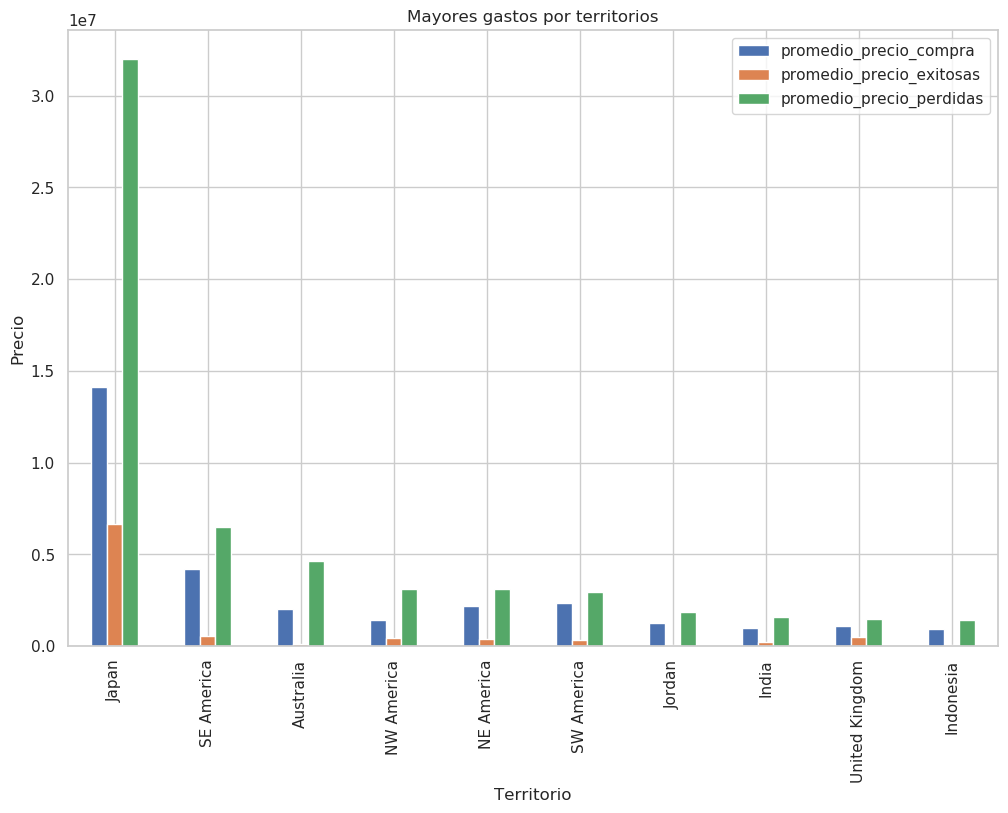

In [519]:
top10_mayores_gastos_perdidos = ventas_final.nlargest(10,'promedio_precio_perdidas')
top10_mayores_gastos_perdidos = top10_mayores_gastos_perdidos[['promedio_precio_compra','promedio_precio_exitosas','promedio_precio_perdidas']]
top10_mayores_gastos_perdidos.plot(kind="bar",stacked=False,title = 'Mayores gastos por territorios' , figsize=(12,8))
plt.xlabel('Territorio', fontsize= 12)
plt.ylabel("Precio", fontsize= 12)

In [520]:
aux = df.loc[df.Region == 'Japan']
aux['Billing_Country'].value_counts()

Japan                                     4874
Singapore                                   10
United Kingdom                               4
India                                        1
Korea, Democratic People's Republic of       1
None                                         1
Germany                                      1
Name: Billing_Country, dtype: int64

Conclusiones:

## Analisis del país donde se emite la factura

Descripción, para que puede servir esto?

Text(0, 0.5, 'Cantidad de apariciones')

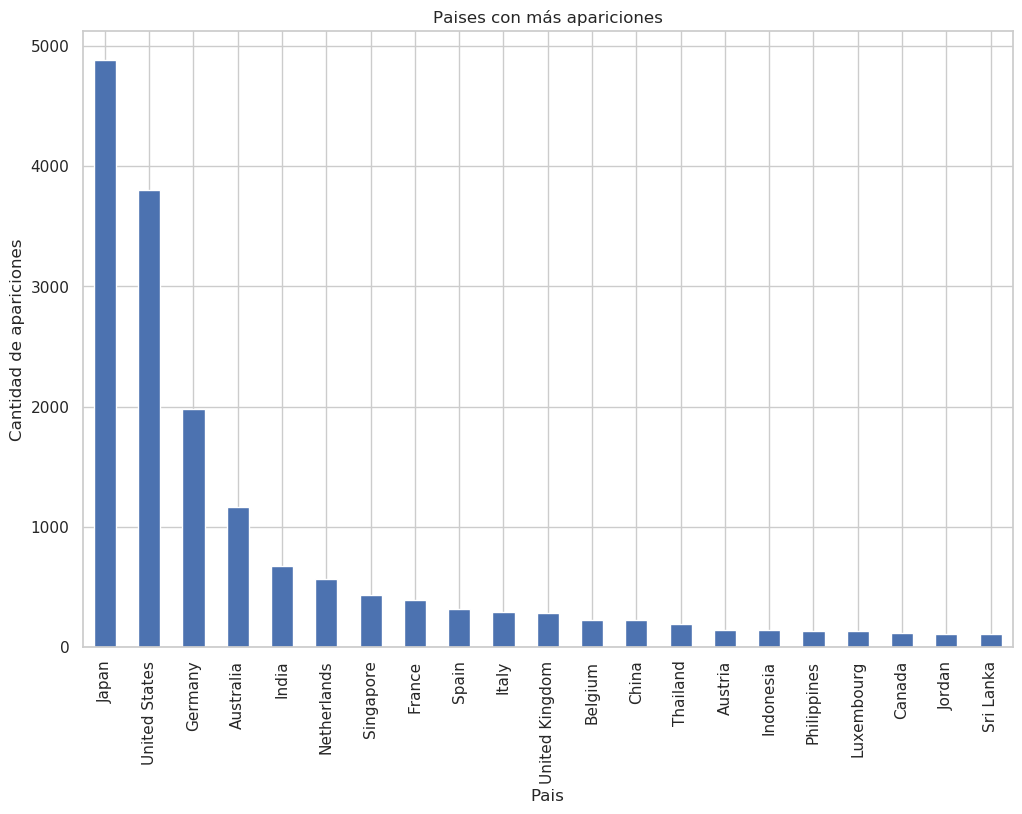

In [521]:
#df['Billing_Country'].value_counts()

country = pd.DataFrame(df['Billing_Country'].value_counts())
country.columns = ['cantidad']

country_filtradas = country.loc[(country.cantidad > 100)] #Numero a elección
country_filtradas["cantidad"].plot(kind="bar",title = 'Paises con más apariciones' , figsize=(12,8))
plt.xlabel('Pais', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

In [522]:
country_aux = country_filtradas.reset_index()
territory_aux = territory_filtradas.reset_index()
country = country.reset_index()

In [523]:
country_aux.columns = ['Territory','cantidad_apariciones_billing_country']
territory_aux.columns = ['Territory','cantidad_apariciones_territory']

In [524]:
f = pd.merge(territory_aux,country_aux, on='Territory',how='outer')
f = f.set_index('Territory')
f

,cantidad_apariciones_territory,cantidad_apariciones_billing_country
Territory,,
Germany,"1,682.00","1,979.00"
NW America,"1,568.00",nan
Australia,"1,208.00","1,169.00"
India,809.00,672.00
NE America,760.00,nan
Japan,681.00,"4,879.00"
Netherlands,533.00,563.00
SE America,493.00,nan
France,449.00,396.00


Text(0, 0.5, 'Cantidad de apariciones')

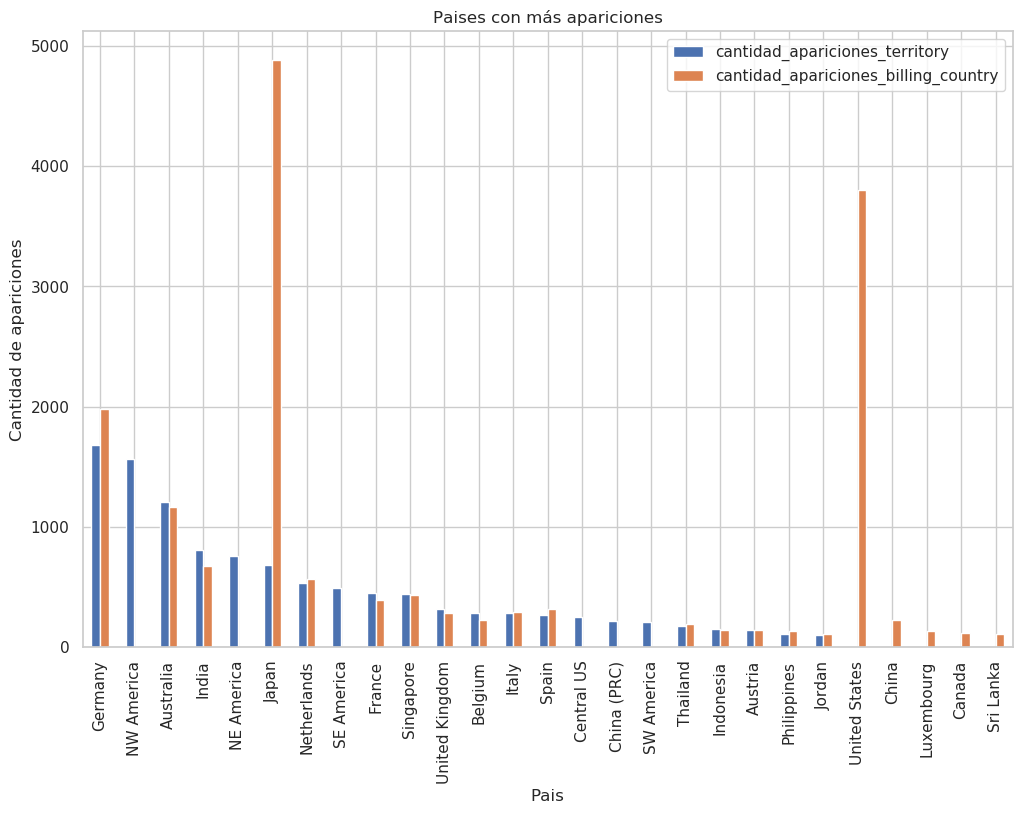

In [525]:
f.plot(kind="bar",title = 'Paises con más apariciones' , figsize=(12,8))
plt.xlabel('Pais', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

In [526]:
columna = pd.to_datetime(df['Account_Created_Date'])
df['Account_Created_Date'] = columna
df.loc[df.Account_Created_Date > '2018-12-20']#.value_counts()

#fecha más antigua : '2013-03-10'
#fecha más reciente : '2018-12-20'

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Opportunity_Created_Date_MM,Opportunity_Created_Date_YYYY,Last_Modified_Date_MM,Last_Modified_Date_YYYY,Planned_Delivery_Start_Date_YYYY,Planned_Delivery_Start_Date_MM
16093,9907,APAC,Indonesia,1,1,1,1,Bureaucratic_Code_4,2018-12-21,None,...,"279,986.00",USD,0.00,Proposal,12,2018,12,2018,2019,6


# Analisis del codigo burocratico

Descripción

In [527]:
bure_code_heat = df.pivot_table(index='Bureaucratic_Code', columns='Stage',\
                                values='ID', aggfunc='count')
bure_code_heat

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Bureaucratic_Code,,,,,
Bureaucratic_Code_0,nan,51.00,nan,nan,nan
Bureaucratic_Code_1,159.00,102.00,nan,nan,nan
Bureaucratic_Code_2,128.00,114.00,nan,nan,nan
Bureaucratic_Code_3,1.00,1.00,nan,nan,nan
Bureaucratic_Code_4,"4,291.00","8,253.00",17.00,26.00,nan
Bureaucratic_Code_5,"2,771.00","1,011.00",1.00,9.00,11.00
Bureaucratic_Code_6,nan,1.00,nan,nan,nan


In [528]:
bure_code_heat.columns = bure_code_heat.columns.tolist()
bure_code_heat = bure_code_heat.reset_index().drop(columns=['Bureaucratic_Code'])
bure_code_heat

,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
0,nan,51.00,nan,nan,nan
1,159.00,102.00,nan,nan,nan
2,128.00,114.00,nan,nan,nan
3,1.00,1.00,nan,nan,nan
4,"4,291.00","8,253.00",17.00,26.00,nan
5,"2,771.00","1,011.00",1.00,9.00,11.00
6,nan,1.00,nan,nan,nan


Text(734.2500000000002, 0.5, 'Codigo burocratico')

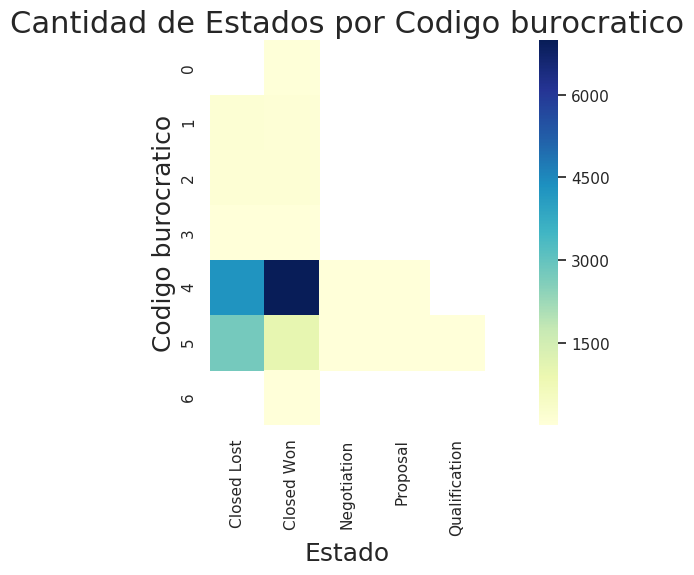

In [529]:
fig, ax = plt.subplots(figsize=(14,5))
g = sns.heatmap(bure_code_heat,  cmap="YlGnBu", ax=ax, robust=True, square=True)
g.set_title("Cantidad de Estados por Codigo burocratico", fontsize=22)
g.set_xlabel("Estado",fontsize=18)
g.set_ylabel("Codigo burocratico", fontsize=18)

Descripción

# Cantidad de ventas por persona

Descripción

In [530]:
s_own = df['Account_Owner'].value_counts()
lista = s_own[s_own > 200].index.tolist()
df_own = df[(df['Account_Owner'].isin(lista)) & (df['Stage'].isin(stage_list))]
#df_own

df_pivot_own = df_own.pivot_table(index='Account_Owner', columns='Stage',\
                                values='ID', aggfunc='count').sort_values(by = ['Closed Won'], ascending = False)
df_pivot_own

Stage,Closed Lost,Closed Won
Account_Owner,,
Person_Name_50,1299,2423
Person_Name_13,436,891
Person_Name_8,523,763
Person_Name_43,508,727
Person_Name_18,496,597
Person_Name_32,110,571
Person_Name_65,127,504
Person_Name_64,189,380
Person_Name_4,361,301


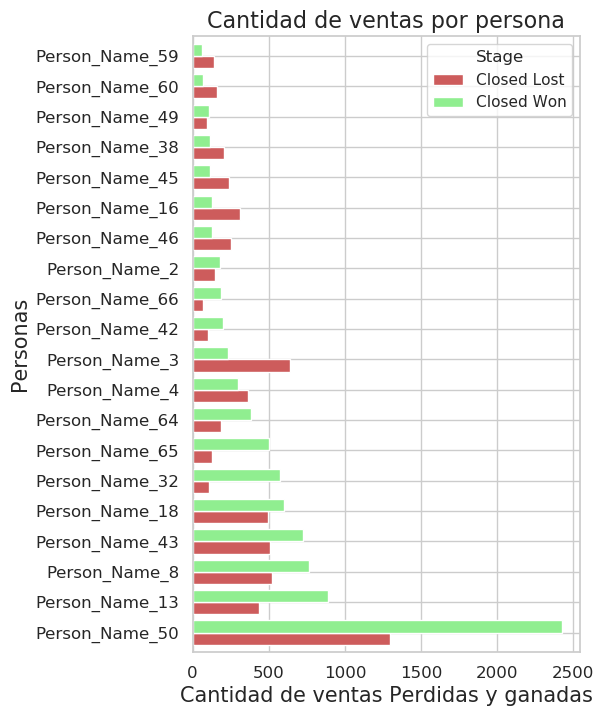

In [531]:
az = df_pivot_own.plot(kind='barh', fontsize=12, color=["indianRed","lightGreen"],width=0.8,figsize=(5, 8))
az.set_title('Cantidad de ventas por persona', fontsize=16);
az.set_xlabel('Cantidad de ventas Perdidas y ganadas', fontsize=15);
az.set_ylabel('Personas', fontsize=15);

Analisis y descripcion

Ahora nos quedaremos con los 8 con más ventas ( falta aclarar lo de la aprobacion)

In [532]:
top8 = df_pivot_own.head(8).index.tolist()
df_top8_vend = df[(df['Account_Owner'].isin(top8)) & \
                  (df['Stage'].isin(stage_list)) & \
                  (df['Pricing, Delivery_Terms_Quote_Appr'] == True) & \
                  (df['Pricing, Delivery_Terms_Approved'] == True)]
#df_top8_vend

In [533]:
df_pivot_own1 = df_top8_vend.pivot_table(index='Account_Owner', columns='Stage',\
                                values='ID', aggfunc='count').sort_values(by = ['Closed Won'], ascending = False)
df_pivot_own1

Stage,Closed Lost,Closed Won
Account_Owner,,
Person_Name_50,104,2370
Person_Name_32,57,489
Person_Name_8,298,460
Person_Name_13,219,438
Person_Name_65,32,373
Person_Name_43,307,341
Person_Name_18,332,287
Person_Name_64,64,151


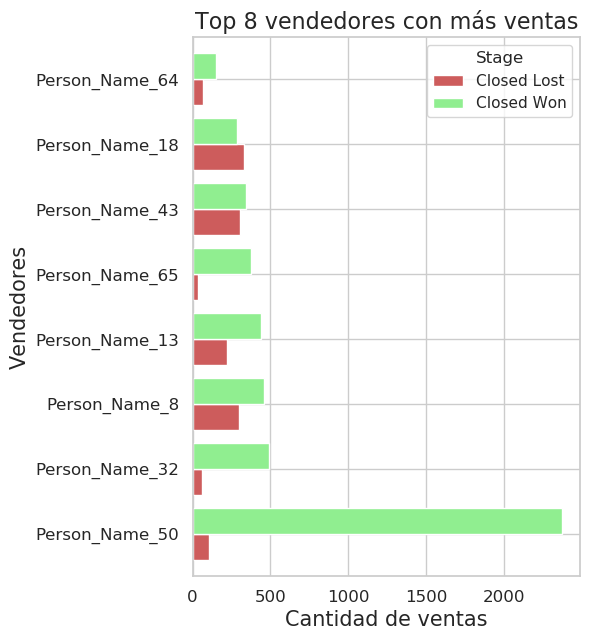

In [534]:
az = df_pivot_own1.plot(kind='barh', fontsize=12, color=["indianRed","lightGreen"],width=0.8,figsize=(5, 7))
az.set_title('Top 8 vendedores con más ventas', fontsize=16);
az.set_xlabel('Cantidad de ventas', fontsize=15);
az.set_ylabel('Vendedores', fontsize=15);

Conclusiones

In [535]:
df_own2 = df[(df['Account_Owner'].isin(lista)) & (df['Stage'].isin(stage_list))]
#df_own

df_pivot_own2 = df_own2.pivot_table(index='Account_Owner', columns='Stage',\
                                values='Total_Amount', aggfunc='mean').sort_values(by = ['Closed Won'], ascending = False)
df_pivot_own2

Stage,Closed Lost,Closed Won
Account_Owner,,
Person_Name_32,"19,575,350.44","3,891,049.60"
Person_Name_66,"11,042,062.47","3,480,593.23"
Person_Name_50,"954,502.35","887,450.61"
Person_Name_8,"6,323,166.14","684,165.56"
Person_Name_3,"3,691,770.69","456,076.41"
Person_Name_4,"1,897,417.85","441,786.52"
Person_Name_46,"851,716.08","375,193.05"
Person_Name_49,"2,594,254.81","325,743.98"
Person_Name_60,"1,176,669.80","292,585.69"


In [536]:
df_pivot_own2.reset_index()

Stage,Account_Owner,Closed Lost,Closed Won
0,Person_Name_32,"19,575,350.44","3,891,049.60"
1,Person_Name_66,"11,042,062.47","3,480,593.23"
2,Person_Name_50,"954,502.35","887,450.61"
3,Person_Name_8,"6,323,166.14","684,165.56"
4,Person_Name_3,"3,691,770.69","456,076.41"
5,Person_Name_4,"1,897,417.85","441,786.52"
6,Person_Name_46,"851,716.08","375,193.05"
7,Person_Name_49,"2,594,254.81","325,743.98"
8,Person_Name_60,"1,176,669.80","292,585.69"
9,Person_Name_38,"1,565,903.84","259,652.31"


In [537]:
df_pivot_own2.columns = ['mean_total_amount_lost','mean_total_amount_won']
#df_pivot_own2

In [538]:
df_own_mergeado = pd.merge(df_pivot_own, df_pivot_own2, on='Account_Owner')
df_own_mergeado

,Closed Lost,Closed Won,mean_total_amount_lost,mean_total_amount_won
Account_Owner,,,,
Person_Name_50,1299,2423,"954,502.35","887,450.61"
Person_Name_13,436,891,"2,200,648.06","238,815.54"
Person_Name_8,523,763,"6,323,166.14","684,165.56"
Person_Name_43,508,727,"4,275,983.00","110,827.39"
Person_Name_18,496,597,"826,071.94","154,639.23"
Person_Name_32,110,571,"19,575,350.44","3,891,049.60"
Person_Name_65,127,504,"2,031,393.14","42,397.85"
Person_Name_64,189,380,"1,308,940.05","75,357.81"
Person_Name_4,361,301,"1,897,417.85","441,786.52"


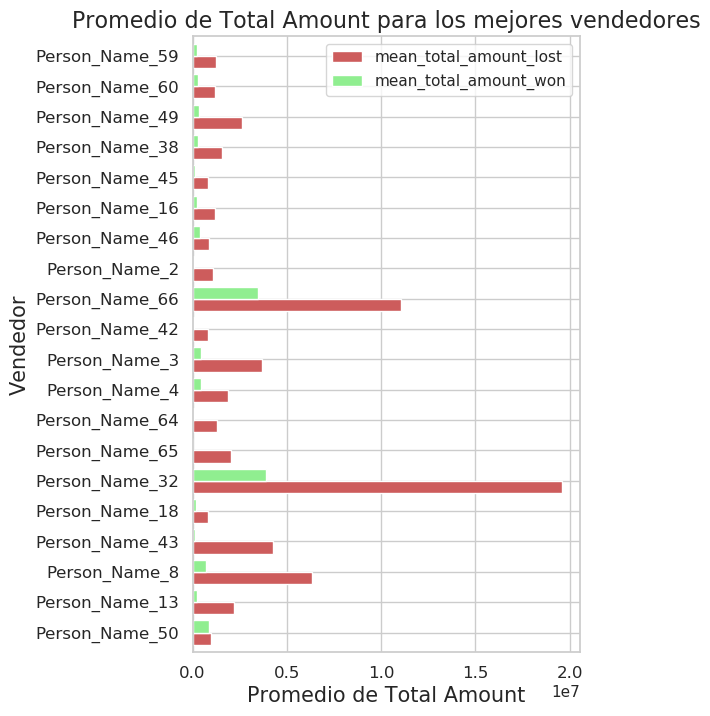

In [539]:
df_own_mergeado = df_own_mergeado[['mean_total_amount_lost','mean_total_amount_won']]
az = df_own_mergeado.plot(kind='barh', fontsize=12, color=["indianRed","lightGreen"],width=0.8,figsize=(5, 8))
az.set_title('Promedio de Total Amount para los mejores vendedores', fontsize=16);
az.set_xlabel('Promedio de Total Amount', fontsize=15);
az.set_ylabel('Vendedor', fontsize=15);

In [540]:
#ventas = ventas.groupby('Territory')['Total_Amount'].agg(['count','mean'])

aux = df[(df['Account_Owner'].isin(top8)) & (df.Territory != 'None')]
#aux = df[(df['Account_Owner'].isin(top8))] #con territorios none

aux = aux.groupby(['Account_Owner','Territory'])['ID'].agg(['count'])
aux.columns = ['cantidad']
aux = aux.loc[aux.cantidad > 10]
aux

cantidad
Account_Owner  Territory               
Person_Name_13 Austria              145
               Denmark               38
               France                11
               Germany              967
               Hungary               15
               Norway                18
               Sweden                12
               Switzerland           16
               Turkey                14
               United Kingdom        13
Person_Name_18 Belgium              284
               France                16
               Luxembourg            70
               Netherlands          394
               United Kingdom       244
Person_Name_32 Japan                456
Person_Name_43 Australia           1197
               New Zealand           38
Person_Name_50 Japan                 59
Person_Name_64 Central US            20
               NW America           471
               SE America            21
Person_Name_65 China (PRC)          216
               Philippines           65
               Singapore            255
               South Korea           15
               Taiwan                32
               Vietnam               36
Person_Name_8  Central US            26
               NE America            99
               NW America           921
               SE America            87
               SW America           107

Un grafico con un mapa iria muy bien acá pero no tengo tiempo 

# Analisis de las fechas de creación de las oportunidades

Descripción

In [541]:
pf_pivot_MM = df[df['Stage'].isin(stage_list)].pivot_table(index='Opportunity_Created_Date_MM', columns='Stage',\
                                values='ID', aggfunc='count')#.sort_values(by = ['Closed Won'], ascending = False)
pf_pivot_MM

Stage,Closed Lost,Closed Won
Opportunity_Created_Date_MM,,
1,742,803
2,685,587
3,616,859
4,529,855
5,638,958
6,640,869
7,554,747
8,416,627
9,616,772


Text(0.5, 1.0, 'Estados de las oportunidades según su mes de creacion')

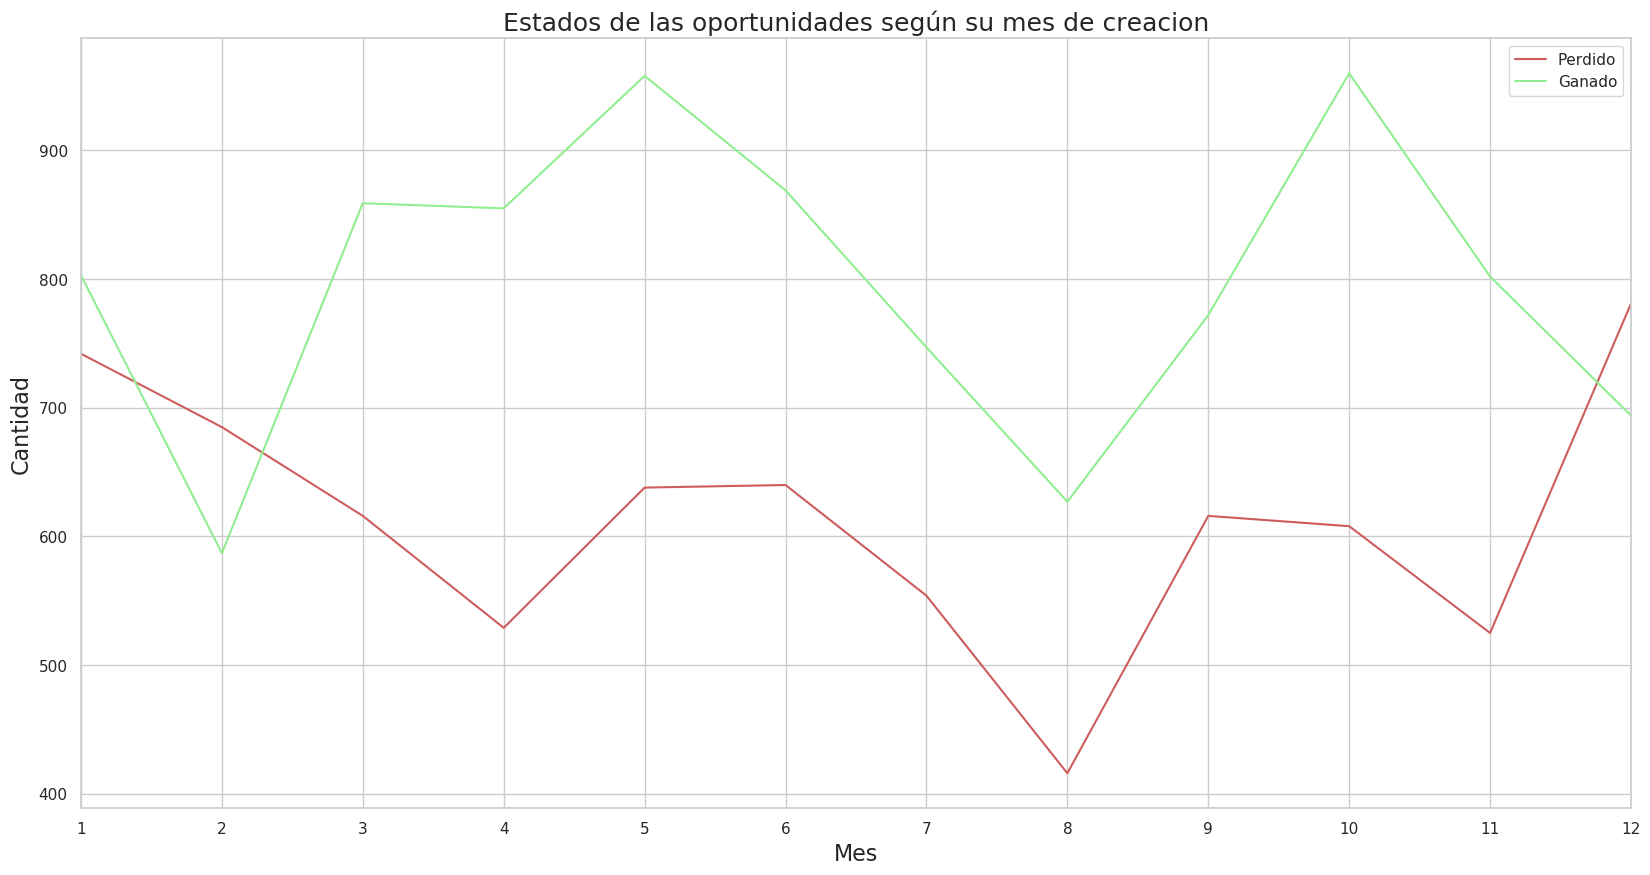

In [542]:
index = pf_pivot_MM.index.tolist()
b = pf_pivot_MM[['Closed Lost','Closed Won']].plot(xticks = index ,color= ['indianRed','lightGreen'])
b.legend(["Perdido", "Ganado"])
b.set_ylabel('Cantidad',fontsize=16)
b.set_xlabel('Mes',fontsize=16)
b.set_title("Estados de las oportunidades según su mes de creacion", fontsize=18)#, bbox=dict(facecolor='green', alpha=0.5))

Un grafico de barras no parece la mejor idea pero como lo hizo mi compañero, lo dejo.

In [543]:
df_won = df[df['Stage'] == 'Closed Won']
df_lost = df[df['Stage'] == 'Closed Lost']

In [544]:
heat_timeW = df_won.pivot_table(index='Opportunity_Created_Date_YYYY', columns='Opportunity_Created_Date_MM',\
                                values='ID', aggfunc='count')\
                                .sort_values(by = ['Opportunity_Created_Date_YYYY'], ascending = False)
heat_timeW.fillna(value=0, inplace=True)

Text(141.25, 0.5, 'Año')

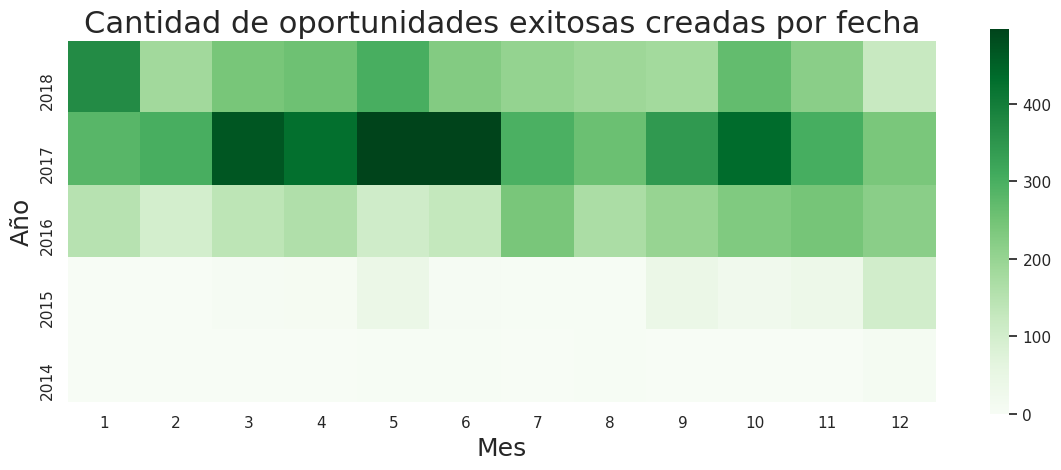

In [545]:
fig, ax = plt.subplots(figsize=(14,5))
g = sns.heatmap(heat_timeW,  cmap="Greens", ax=ax, robust=True, square=True)
g.set_title("Cantidad de oportunidades exitosas creadas por fecha", fontsize=22)
g.set_xlabel("Mes",fontsize=18)
g.set_ylabel("Año", fontsize=18)

Descripción

In [546]:
heat_timeL = df_lost.pivot_table(index='Opportunity_Created_Date_YYYY', columns='Opportunity_Created_Date_MM',\
                                values='ID', aggfunc='count').sort_values(by = ['Opportunity_Created_Date_YYYY'], ascending = False)
heat_timeL.fillna(value=0, inplace=True)
#heat_timeL

Text(239.2500000000001, 0.5, 'Año')

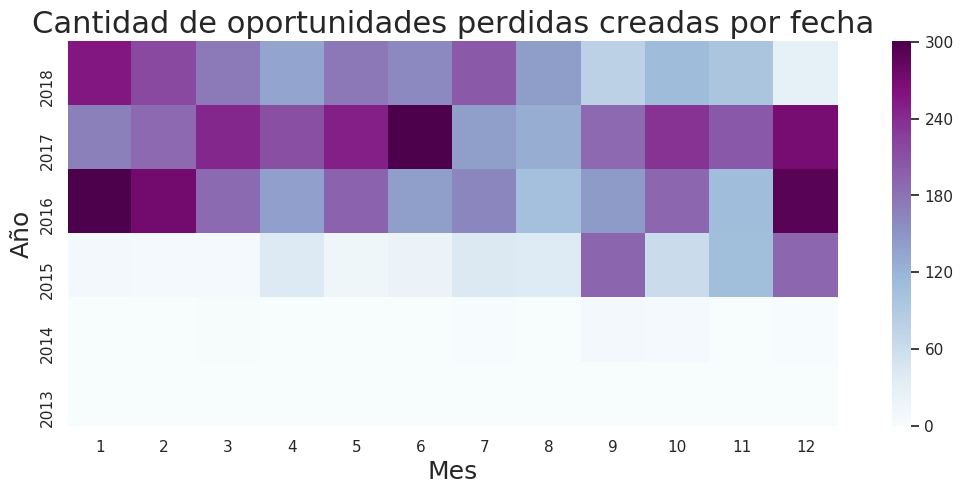

In [547]:
fig, ax = plt.subplots(figsize=(14,5))
g = sns.heatmap(heat_timeL,  cmap="BuPu", ax=ax, robust=True, square=True)
g.set_title("Cantidad de oportunidades perdidas creadas por fecha", fontsize=22)
g.set_xlabel("Mes",fontsize=18)
g.set_ylabel("Año", fontsize=18)

Descripción

# Analisis de las oportunidades segun su fecha de ultima modificacion

descripcion

In [548]:
pf_pivot_MM_last_modified = df[df['Stage'].isin(stage_list)].pivot_table(index='Last_Modified_Date_MM', \
                    columns='Stage',values='ID', aggfunc='count')#.sort_values(by = ['Closed Won'], ascending = False)
#pf_pivot_MM_last_modified

Text(0.5, 1.0, 'Estados de las oportunidades segun su mes de ultima modificacion')

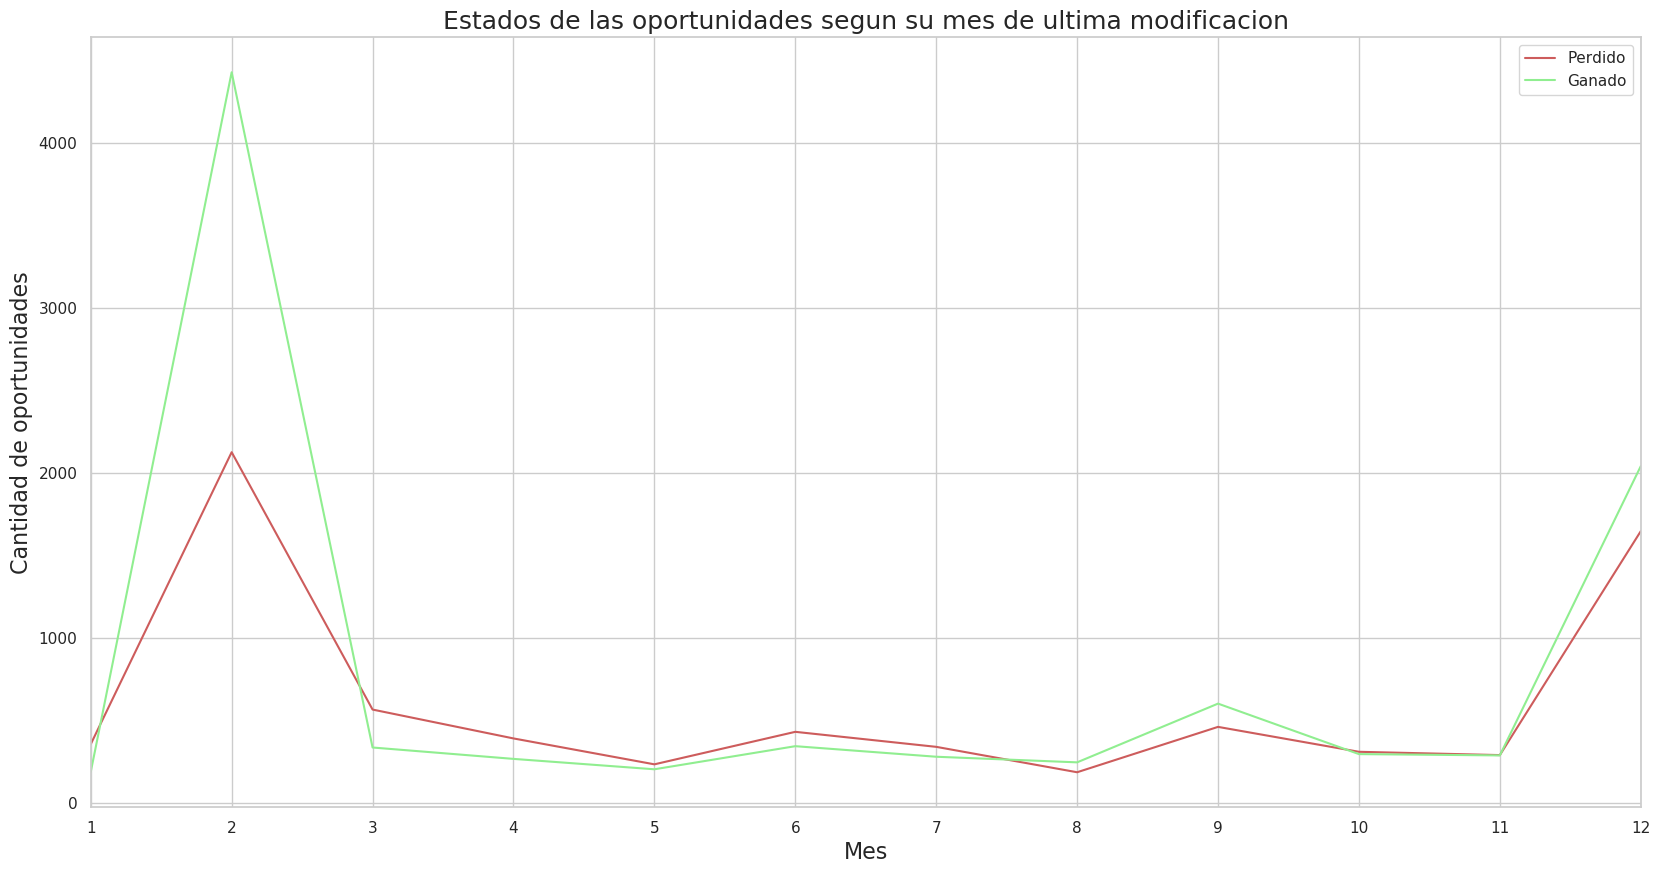

In [549]:
index = pf_pivot_MM_last_modified.index.tolist()
b = pf_pivot_MM_last_modified[['Closed Lost','Closed Won']].plot(xticks = index ,color= ['indianRed','lightGreen'])
b.legend(["Perdido", "Ganado"])
b.set_ylabel('Cantidad de oportunidades',fontsize=16)
b.set_xlabel('Mes',fontsize=16)
b.set_title("Estados de las oportunidades segun su mes de ultima modificacion", fontsize=18)#, bbox=dict(facecolor='green', alpha=0.5))

Descripción

Text(945.0833333333334, 0.5, 'Mes')

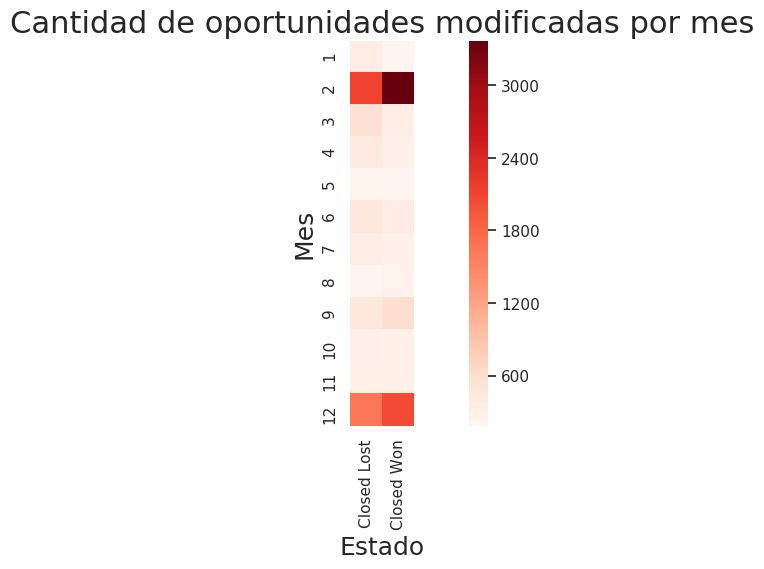

In [550]:
fig, ax = plt.subplots(figsize=(14,5))
g = sns.heatmap(pf_pivot_MM_last_modified,  cmap="Reds", ax=ax, robust=True, square=True)
g.set_title("Cantidad de oportunidades modificadas por mes", fontsize=22)
g.set_xlabel("Estado",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

Descripción

In [551]:
heat_timeW2 = df_won.pivot_table(index='Last_Modified_Date_YYYY',\
                                 columns='Last_Modified_Date_MM',\
                                 values='ID', aggfunc='count')\
                                .sort_values(by = ['Last_Modified_Date_YYYY'], ascending = False)
heat_timeW2.fillna(value=0, inplace=True)
#heat_timeW2

Text(141.25, 0.5, 'Año')

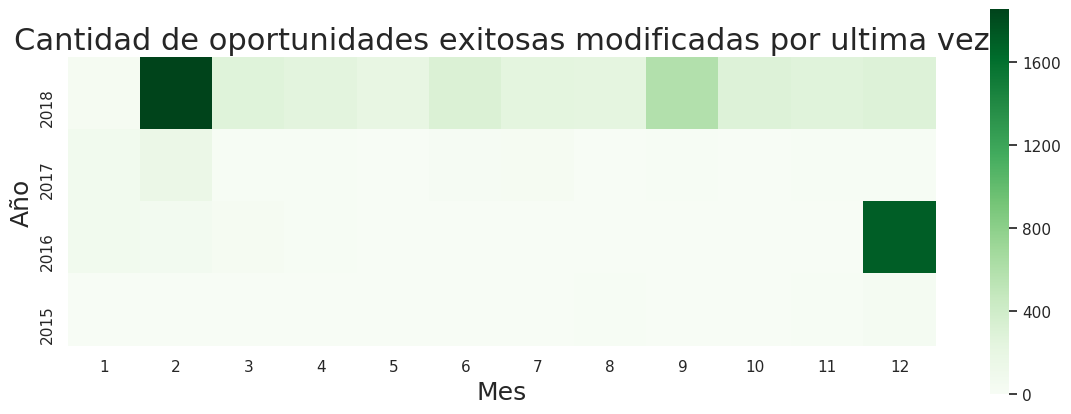

In [552]:
fig, ax = plt.subplots(figsize=(14,5))
g = sns.heatmap(heat_timeW2,  cmap="Greens", ax=ax, robust=True, square=True)
g.set_title("Cantidad de oportunidades exitosas modificadas por ultima vez", fontsize=22)
g.set_xlabel("Mes",fontsize=18)
g.set_ylabel("Año", fontsize=18)

In [553]:
heat_timeL2 = df_lost.pivot_table(index='Last_Modified_Date_YYYY', columns='Last_Modified_Date_MM',\
                                values='ID', aggfunc='count').sort_values(by = ['Last_Modified_Date_YYYY'], ascending = False)
heat_timeL2.fillna(value=0, inplace=True)
#heat_timeL2

Text(141.25, 0.5, 'Año')

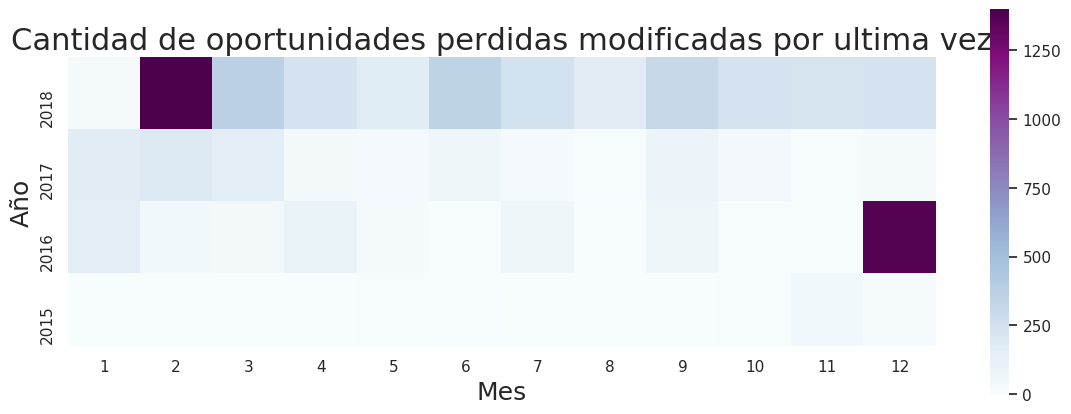

In [554]:
fig, ax = plt.subplots(figsize=(14,5))
g = sns.heatmap(heat_timeL2,  cmap="BuPu", ax=ax, robust=True, square=True)
g.set_title("Cantidad de oportunidades perdidas modificadas por ultima vez", fontsize=22)
g.set_xlabel("Mes",fontsize=18)
g.set_ylabel("Año", fontsize=18)

Se observa ...

# Analisis del tiempo transcurrido

descripción

In [555]:
df['Tiempo_Total'] = (df['Last_Modified_Date'] - df['Opportunity_Created_Date'])#.astype(int)

df_dias = df.groupby('Tiempo_Total')['Tiempo_Total'].agg(['count'])
df_dias = df_dias.reset_index()
df_dias.columns = ['Tiempo_Total','cantidad']

limite = df_dias.iloc[30,0]
#df_dias
#df['Tiempo_Total'].value_counts()

In [556]:
aux = df[(df['Stage'].isin(stage_list))]
df_tiempo_transcurrido = aux.loc[aux.Tiempo_Total < limite]
df_tiempo_transcurrido = df_tiempo_transcurrido.groupby(['Stage','Tiempo_Total'])['Total_Amount'].agg(['count'])
df_tiempo_transcurrido.columns = ['cantidad']
#df_tiempo_transcurrido

In [557]:
df_tiempo_transcurrido = df_tiempo_transcurrido.reset_index()
df_tiempo_transcurrido = df_tiempo_transcurrido.pivot(index='Tiempo_Total',columns='Stage',values='cantidad')

Text(0, 0.5, 'Cantidad de ventas cerradas')

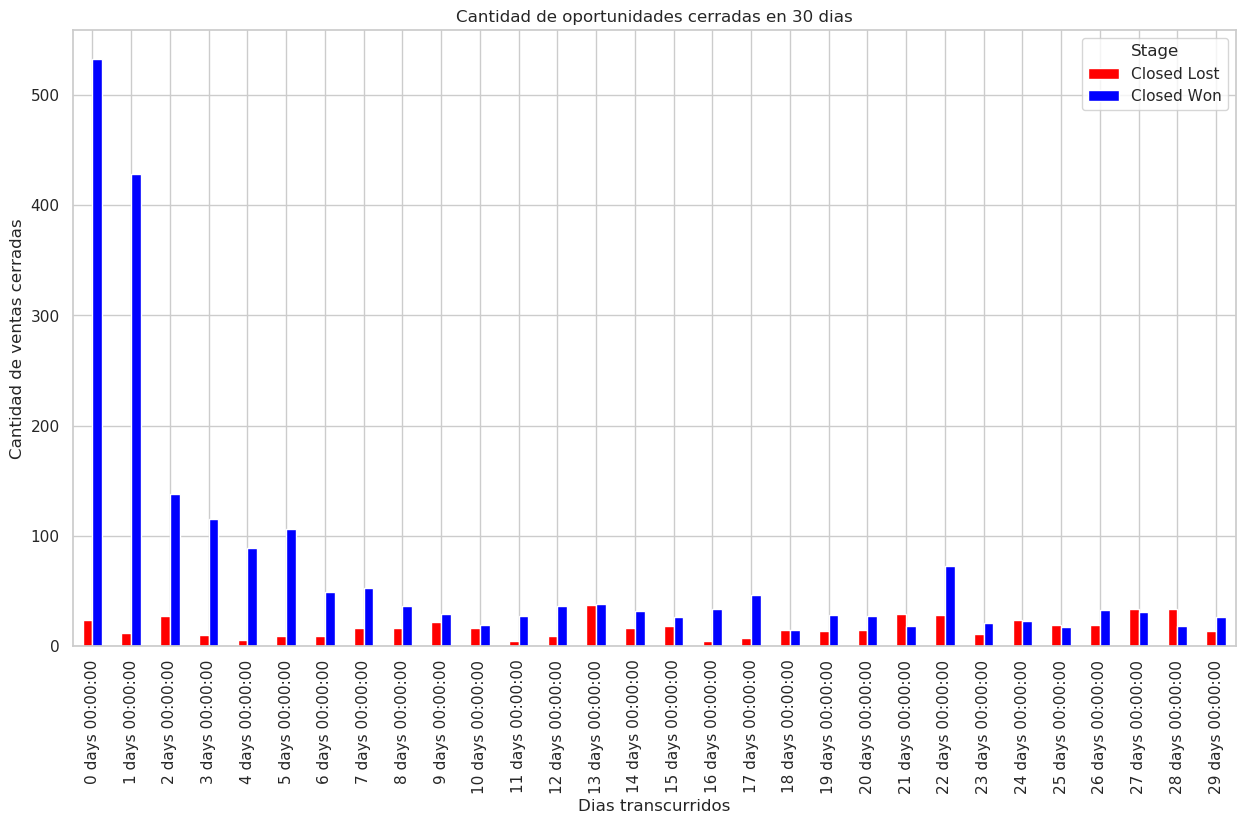

In [558]:
df_tiempo_transcurrido.plot(kind="bar",color=colores, stacked=False,figsize=(15,8),\
                            title = 'Cantidad de oportunidades cerradas en 30 dias')
plt.xlabel('Dias transcurridos', fontsize= 12)
plt.ylabel("Cantidad de ventas cerradas", fontsize= 12)

In [559]:
df_dias_filtrado = df_dias.loc[df_dias.cantidad>120]
#df_dias_filtrado.reset_index()
#df_dias_filtrado.set_index('Tiempo_Total')
df_dias_filtrado

,Tiempo_Total,cantidad
0,0 days,578
1,1 days,453
2,2 days,170
3,3 days,126
125,125 days,134
223,223 days,131
269,269 days,147
275,275 days,128
293,293 days,122
317,317 days,139


In [560]:
aux = df.loc[(df.Stage == 'Closed Lost')]
df_tiempo_transcurrido1 = aux.loc[(aux.Tiempo_Total > limite)]
df_tiempo_transcurrido1 = df_tiempo_transcurrido1.groupby(['Stage','Tiempo_Total'])['Total_Amount'].agg(['count'])
df_tiempo_transcurrido1.columns = ['cantidad']
df_tiempo_transcurrido1aux = df_tiempo_transcurrido1
df_tiempo_transcurrido1 = df_tiempo_transcurrido1.loc[df_tiempo_transcurrido1.cantidad > 25]
#df_tiempo_transcurrido1

In [561]:
df_tiempo_transcurrido1 = df_tiempo_transcurrido1.reset_index()
df_tiempo_transcurrido1 = df_tiempo_transcurrido1.pivot(index='Tiempo_Total',columns='Stage',values='cantidad')

Text(0, 0.5, 'Cantidad de ventas perdidas')

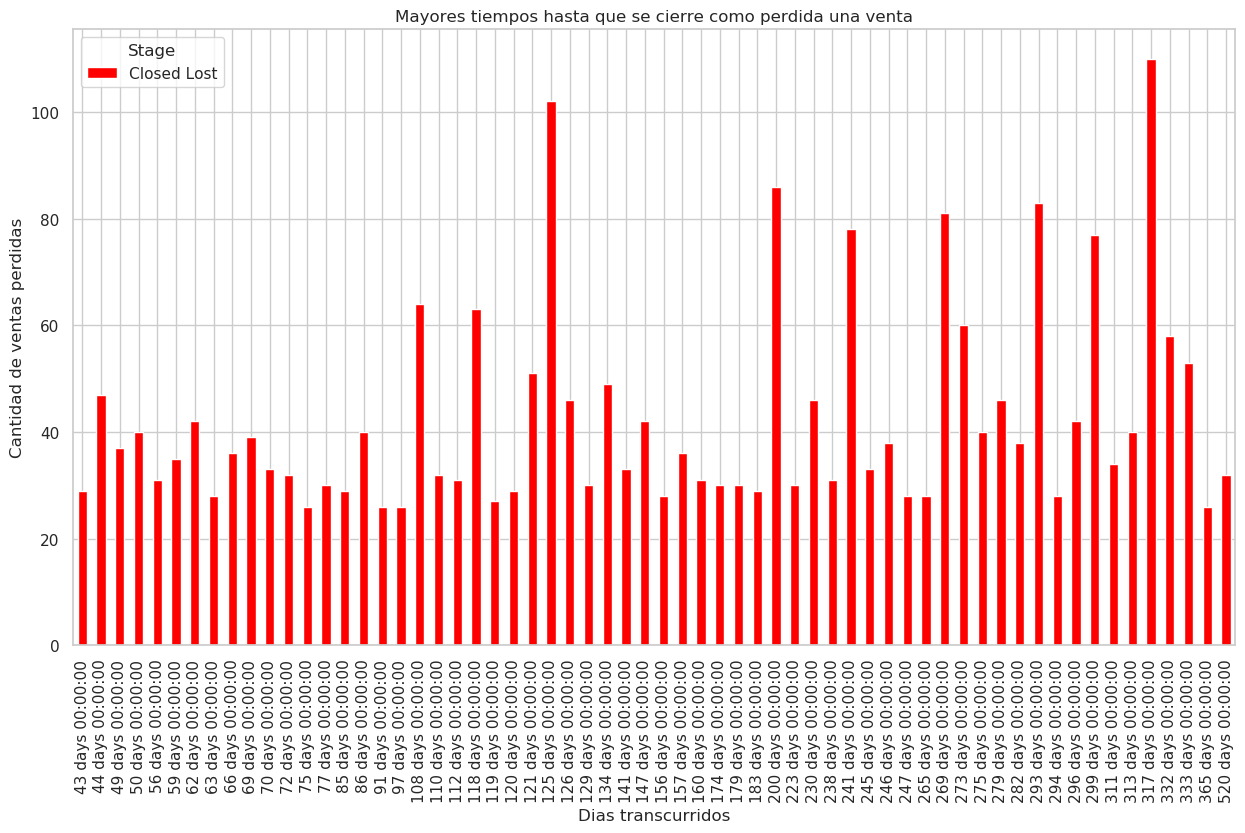

In [562]:
df_tiempo_transcurrido1.plot(kind="bar",color=colores, stacked=False,figsize=(15,8),\
                            title = 'Mayores tiempos hasta que se cierre como perdida una venta')
plt.xlabel('Dias transcurridos', fontsize= 12)
plt.ylabel("Cantidad de ventas perdidas", fontsize= 12)

In [593]:
aux = df.loc[(df.Stage == 'Closed Lost') | (df.Stage == 'Closed Won')]
df_tiempo_transcurrido3 = aux
df_tiempo_transcurrido3 = df_tiempo_transcurrido3.groupby(['Stage','Tiempo_Total'])['Total_Amount'].agg(['count'])
df_tiempo_transcurrido3.columns = ['cantidad']
#df_tiempo_transcurrido1

In [594]:
df_tiempo_transcurrido3 = df_tiempo_transcurrido3.reset_index()
df_tiempo_transcurrido3 = df_tiempo_transcurrido3.pivot(index='Tiempo_Total',columns='Stage',values='cantidad')

In [595]:
df_tiempo_transcurrido3

Stage,Closed Lost,Closed Won
Tiempo_Total,,
0 days,24.00,532.00
1 days,12.00,428.00
2 days,27.00,138.00
3 days,10.00,115.00
4 days,6.00,89.00
5 days,9.00,106.00
6 days,9.00,49.00
7 days,16.00,53.00
8 days,16.00,36.00


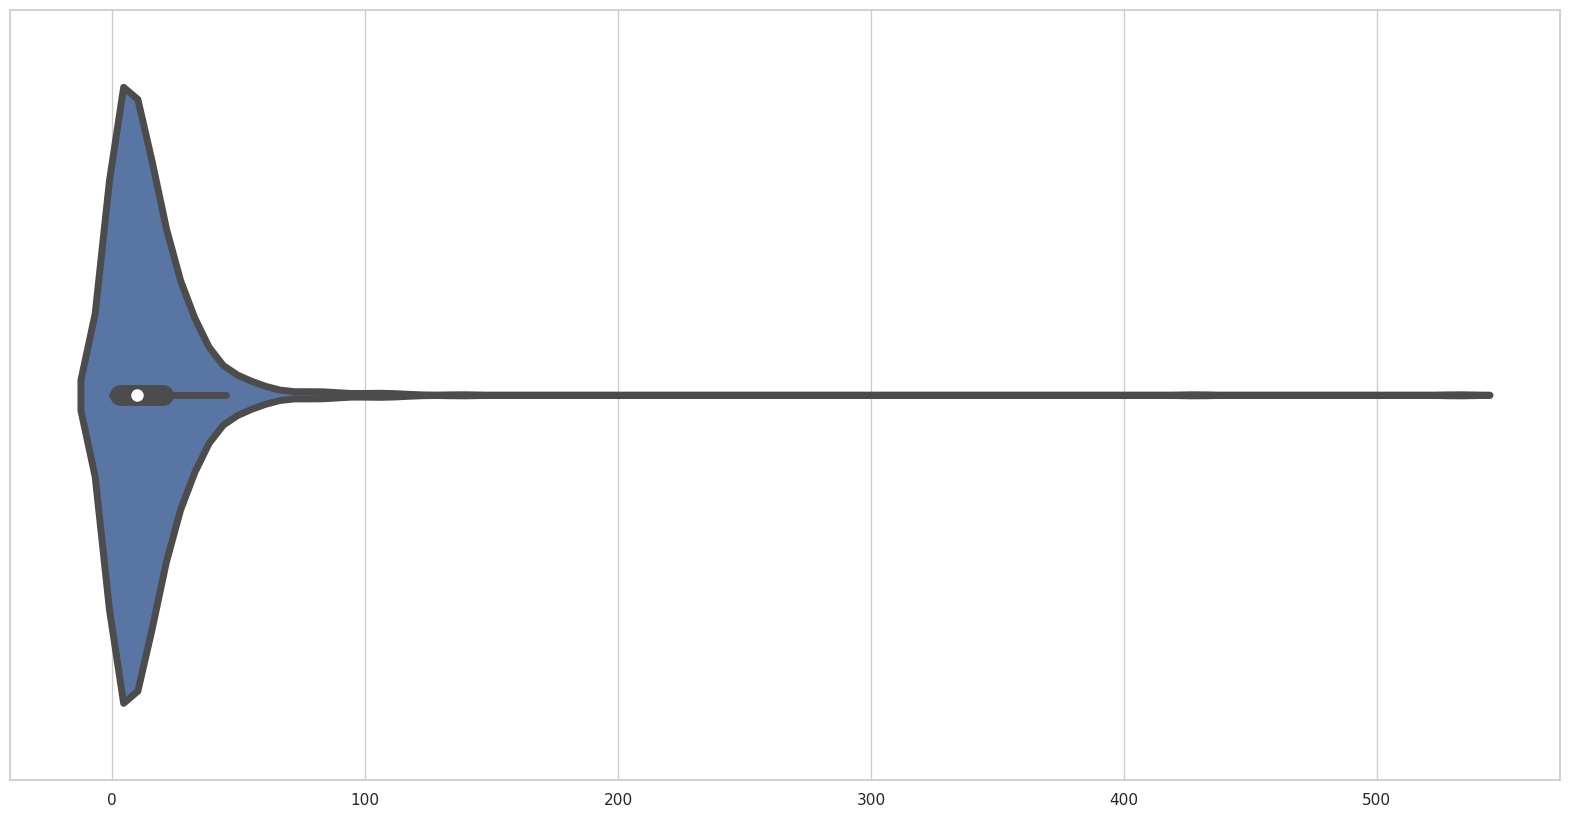

In [596]:
sns.violinplot( x=df_tiempo_transcurrido3, linewidth=5, data=df_tiempo_transcurrido3)

In [566]:
aux2 = df.loc[(df.Stage == 'Closed Won')]
df_tiempo_transcurrido2 = aux2.loc[(aux2.Tiempo_Total > limite)]
df_tiempo_transcurrido2 = df_tiempo_transcurrido2.groupby(['Stage','Tiempo_Total'])['Total_Amount'].agg(['count'])
df_tiempo_transcurrido2.columns = ['cantidad']
df_tiempo_transcurrido_aux = df_tiempo_transcurrido2
df_tiempo_transcurrido2 = df_tiempo_transcurrido2.loc[df_tiempo_transcurrido2.cantidad > 30]


In [567]:
df_tiempo_transcurrido2 = df_tiempo_transcurrido2.reset_index()
df_tiempo_transcurrido2 = df_tiempo_transcurrido2.pivot(index='Tiempo_Total',columns='Stage',values='cantidad')

In [597]:
#df_tiempo_transcurrido_aux

Text(0, 0.5, 'Cantidad de ventas perdidas')

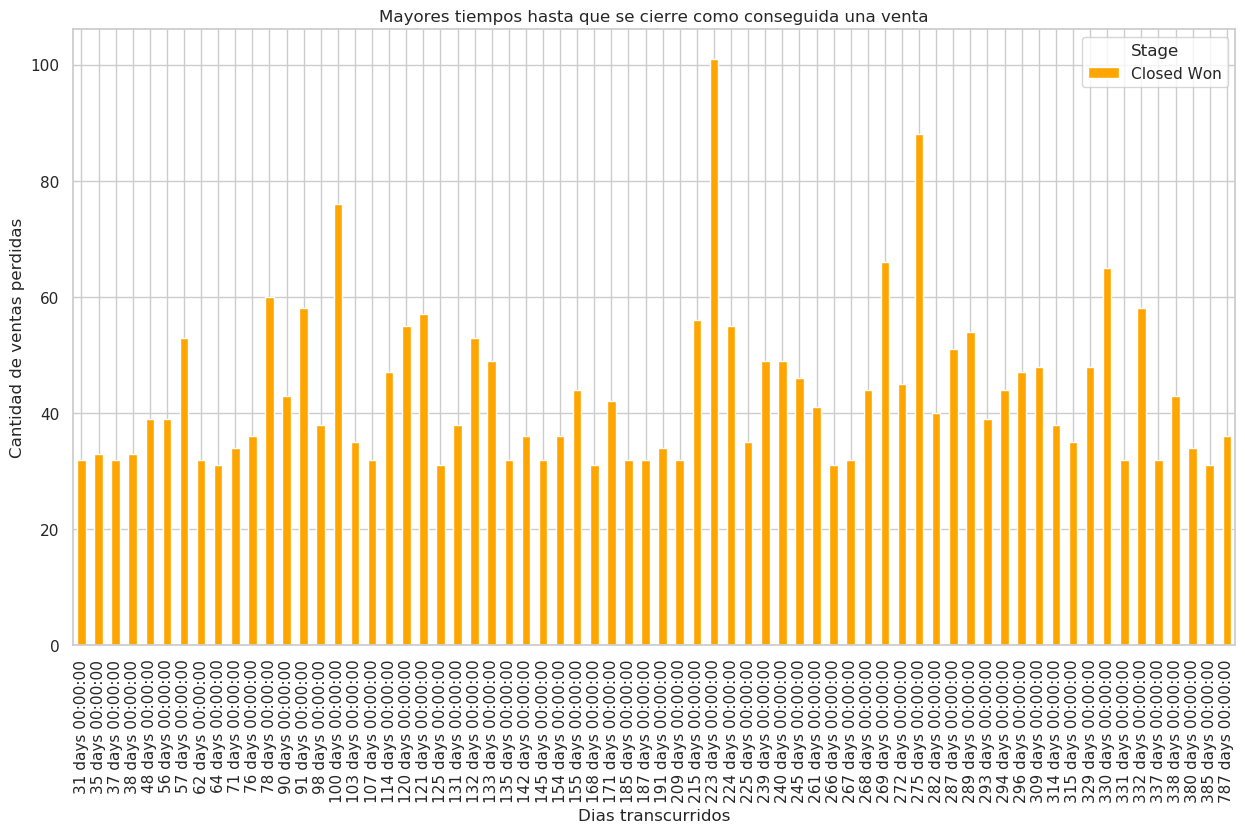

In [569]:
df_tiempo_transcurrido2.plot(kind="bar",color='orange', stacked=False,figsize=(15,8),\
                            title = 'Mayores tiempos hasta que se cierre como conseguida una venta')
plt.xlabel('Dias transcurridos', fontsize= 12)
plt.ylabel("Cantidad de ventas perdidas", fontsize= 12)

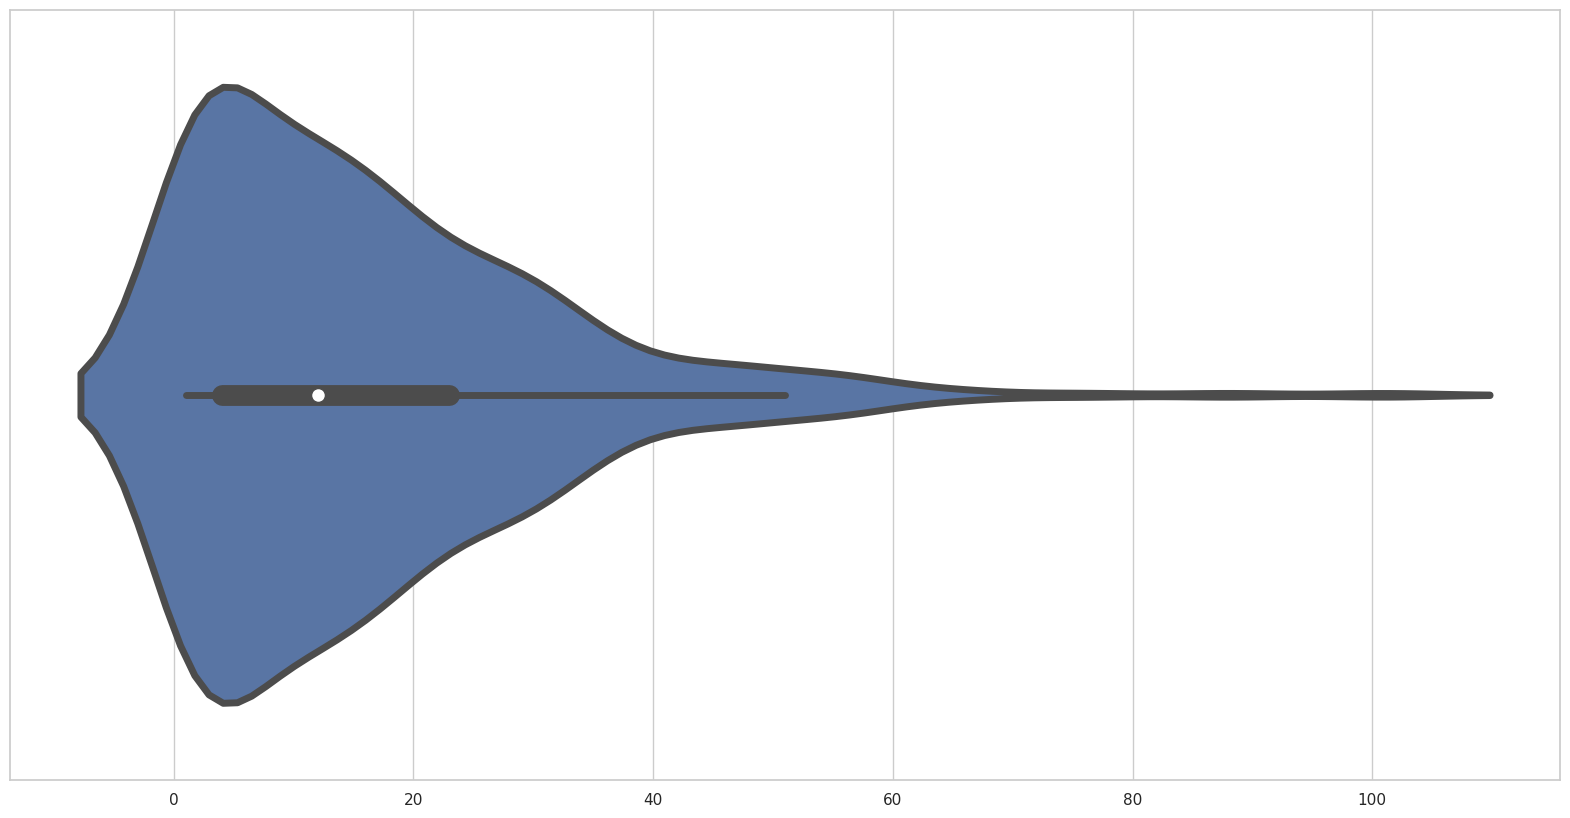

In [570]:
sns.violinplot( x=df_tiempo_transcurrido_aux, linewidth=5, data=df_tiempo_transcurrido_aux)

In [571]:
df_dolares = df[df['Total_Amount_Currency'] == 'USD']

prueba = df_dolares.groupby('Stage').agg({'Total_Amount': ['mean','count']})
prueba

Total_Amount      
                              mean count
Stage                                   
Closed Lost           3,210,571.28  3682
Closed Won              289,166.20  3592
Negotiation              97,164.19    16
Proposal                787,491.26    21
Qualification         1,098,307.00     3

In [572]:
aux = df.groupby(['TRF','Territory'])['ASP'].agg(['count'])
aux.columns = ['cantidad']
aux = aux.loc[aux.cantidad > 50]
aux

cantidad
TRF Territory               
0   Australia            987
    Austria              133
    Belgium              224
    Central US            82
    China (PRC)          211
    France               237
    Germany              927
    India                393
    Indonesia             81
    Italy                237
    Japan                577
    Jordan                63
    Luxembourg            66
    NE America           264
    NW America           693
    Netherlands          342
    None                1663
    Philippines           72
    SE America           186
    Singapore            383
    Spain                225
    Thailand              93
    United Kingdom       171
1   Australia             61
    France                95
    Germany              424
    India                185
    Japan                 51
    NE America           134
    NW America           441
    Netherlands           81
    None                 192
    SE America            71
2   Germany               78
    India                 66
    NE America            59
    NW America            88
    None                  68
5   United Kingdom        55

In [573]:
#Como aumenta el precio segun la TRF ?

In [574]:
aux2 = df.groupby(['TRF','Total_Amount'])['ASP'].agg(['count'])
aux2.columns = ['cantidad']
aux2 = aux2.loc[aux2.cantidad > 10]
aux2

cantidad
TRF Total_Amount          
0           0.00        25
        1,600.00        22
        4,400.00        15
        6,200.00        16
       24,360.00        11
       36,540.00        12
       45,675.00        13
       69,069.00        11
       69,177.50        11
       69,300.00        11
       72,543.75        25
       72,817.80        14
       73,150.00        33
       74,250.00        13
       74,340.00        14
       75,075.00        20
       75,281.25        11
       75,600.00        17
       75,810.00        13
       75,937.50        17
       77,140.00        27
       77,343.75        17
       77,910.00        21
       78,375.00        11
       78,470.00        25
       78,662.50        24
       79,170.00        13
       79,800.00        42
       81,200.00        75
       81,900.00        12
...                    ...
      105,560.00        27
      105,840.00        41
      107,250.00        16
      108,605.00        13
      109,620.00       100
      110,477.50        68
      117,600.00        20
      123,480.00        12
      123,585.00        31
      157,325.00        15
      210,053.25        12
      265,200.00        15
      287,100.00        15
      304,200.00        11
      318,500.00        12
      353,600.00        11
      382,200.00        12
      398,125.00        15
    4,410,000.00        20
1     206,294.40        13
      235,987.50        13
      243,600.00        17
      271,377.00        12
      314,650.00        18
      373,520.00        15
      421,225.00        15
      438,074.00        12
      441,525.00        13
      463,446.90        11
      485,515.80        15

[81 rows x 1 columns]

In [575]:
#aux = df.groupby(['Size','Price']).agg({'Size': 'count'})
#aux.columns = ['cantidad']
#aux

In [576]:
#aux = df.groupby(['TRF','Price']).agg({'Stage': 'count'})
#aux.columns = ['cantidad']
#aux

In [577]:
subset = df.loc[8:30, ["Region", "Total_Taxable_Amount", "Total_Amount", "Stage", "Opportunity_Name"]]
# subset tiene 23 filas pero sólo 6 opportunity_name distintos
print(f"Filas: {subset.shape[0]}, oportunidades: {subset.Opportunity_Name.nunique()}") 
# Sumamos a ver si coincide
sumado = subset\
.groupby(["Opportunity_Name", "Stage", "Region"])\
.agg({"Total_Taxable_Amount": lambda s: s.iloc[0], "Total_Amount": sum})
# Revisemos si coincide:
print("Coinciden todos en el subset: ", all(abs(sumado.Total_Taxable_Amount-sumado.Total_Amount) < 0.01))

Filas: 23, oportunidades: 6
Coinciden todos en el subset:  True


In [578]:
#aux = df.groupby(['Region','Total_Amount'])['Total_Amount'].agg(['count'])
#aux.columns = ['cantidad']
#aux = aux.loc[aux.cantidad>0]
#aux = aux.reset_index()
aux1 = df.loc[(df.Total_Amount > 1000000)]
aux1['Total_Amount_new'] = np.log(aux1['Total_Amount'])

#aux1[['Total_Amount','Total_Amount_new']]

/home/alejandro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


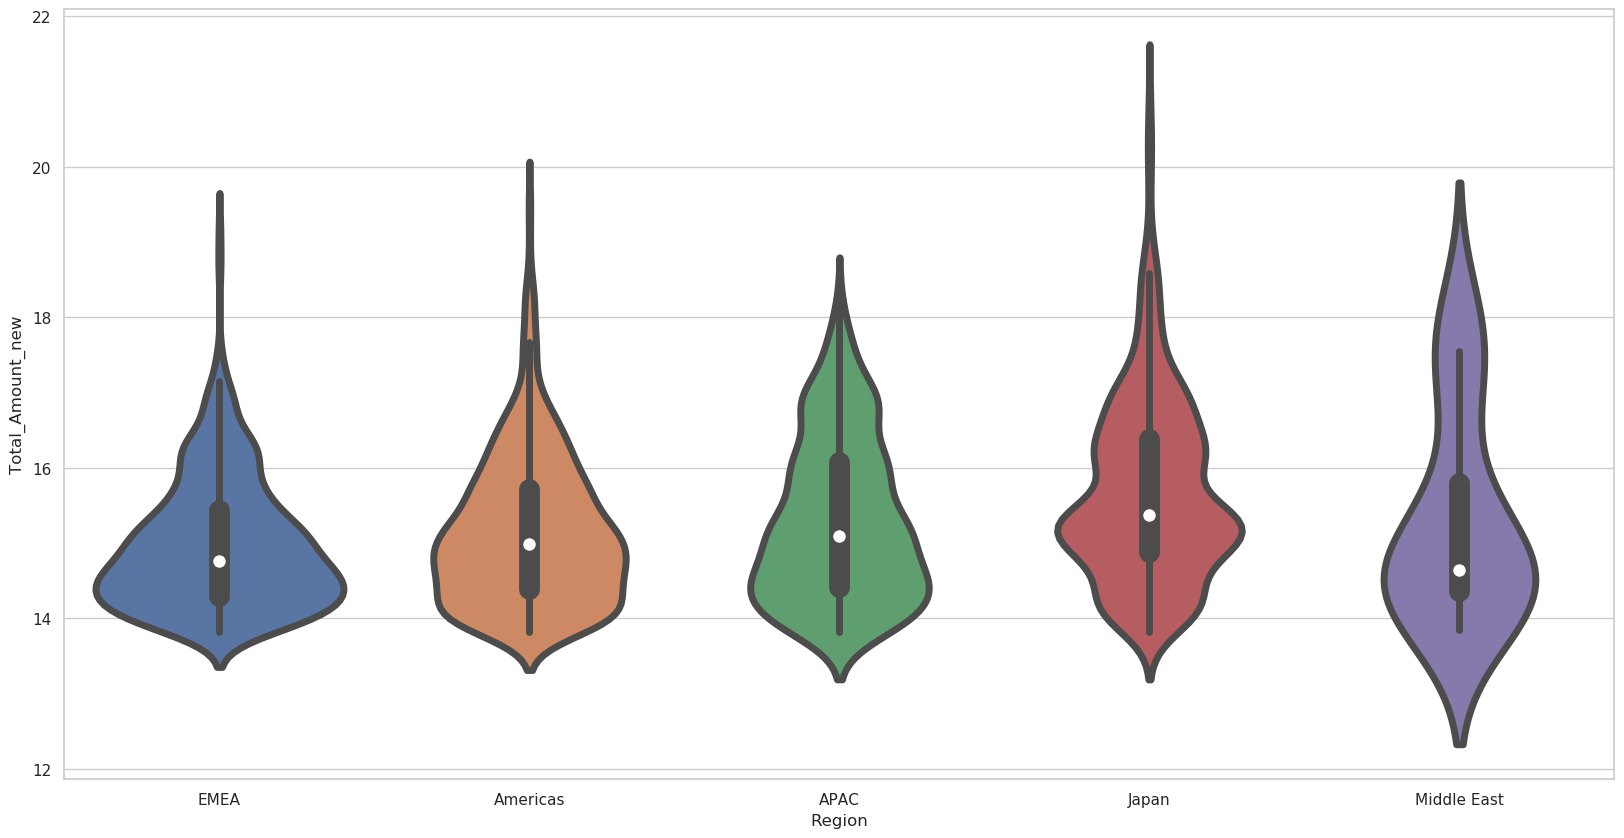

In [579]:
sns.violinplot( x=aux1["Region"], y=aux1['Total_Amount_new'], linewidth=5, data=df)

In [580]:
aux = df.groupby(['Pricing, Delivery_Terms_Quote_Appr','Pricing, Delivery_Terms_Approved','Stage'])['Bureaucratic_Code'].agg(['count'])
aux.columns=['cantidad']
aux = aux.loc[aux.cantidad > 30] #la mayoria de los que necesitan una aprobación, la consiguen
aux

cantidad
Pricing, Delivery_Terms_Quote_Appr Pricing, Delivery_Terms_Approved Stage                
0                                  0                                Closed Lost      1136
                                                                    Closed Won       2118
1                                  0                                Closed Lost      2771
                                                                    Closed Won       1011
                                   1                                Closed Lost      3443
                                                                    Closed Won       6404

In [581]:
df[['ID','Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved','Bureaucratic_Code','Account_Type']]

,ID,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Type
0,27761,1,1,Bureaucratic_Code_4,Account_Type_2
1,27760,0,0,Bureaucratic_Code_4,Account_Type_2
2,27446,0,0,Bureaucratic_Code_4,Account_Type_5
3,16808,1,0,Bureaucratic_Code_5,Account_Type_5
4,16805,1,0,Bureaucratic_Code_5,Account_Type_5
5,16802,1,0,Bureaucratic_Code_5,Account_Type_5
6,16799,1,0,Bureaucratic_Code_5,Account_Type_5
7,27455,1,1,Bureaucratic_Code_4,Account_Type_5
8,24353,0,0,Bureaucratic_Code_5,Account_Type_2
9,24355,0,0,Bureaucratic_Code_5,Account_Type_2


In [582]:
#ASP: (Average Selling Price) precio promedio a la venta (Decimal).


In [583]:
aux = df.groupby(['Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved','Stage'])['Bureaucratic_Code'].agg(['count'])
aux.columns=['cantidad']
aux = aux.loc[aux.cantidad > 30] #la mayoria de los que necesitan una aprobación, la consiguen
aux

cantidad
Bureaucratic_Code_0_Approval Bureaucratic_Code_0_Approved Stage                
0                            0                            Closed Lost      2961
                                                          Closed Won       5928
1                            0                            Closed Lost      1846
                                                          Closed Won        787
                             1                            Closed Lost      2543
                                                          Closed Won       2818

Text(0.5, 1.0, 'Sankey diagram with default settings')

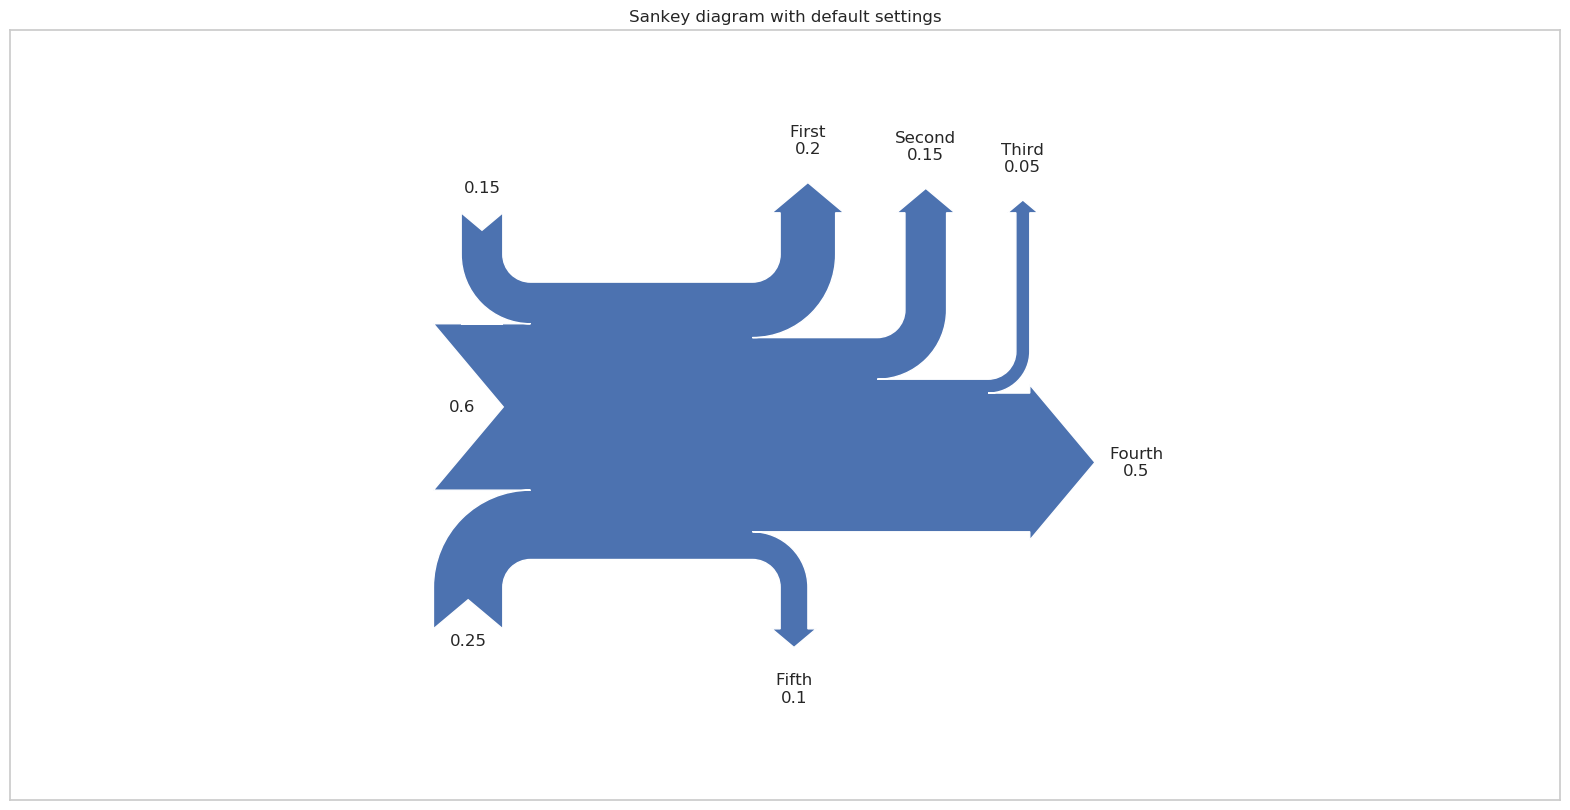

In [584]:

from matplotlib.sankey import Sankey
 
# basic sankey chart
Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10], labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'], orientations=[-1, 1, 0, 1, 1, 1, 0,-1]).finish()
plt.title("Sankey diagram with default settings")
